# Práctica Minería de Datos

**Este documento contiene la parte práctica de la tarea de evaluación del módulo de Minería de Datos.** 

**La idea es que vayas avanzando en el documento y completando códigos (asegurando ejecutar para que se vean las salidas) y preguntas asociadas.**

**Una vez terminado, lo guardas con el nombre "PracticaMineria_NombreApellido.ipynb" para adjuntarlo a la entrega.** 

**A disfrutar del proceso!**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import NuestrasFunciones

import plotly.express as px
from plotly.subplots import make_subplots
#from ydata_profiling import ProfileReport
import seaborn as sns

from sklearn.metrics import r2_score
import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

## Pregunta 1

Indica en el siguiente chunk el código necesario para importar el conjunto de datos **"FEV_data.csv"** y muestra la información del archivo. 

<Axes: >

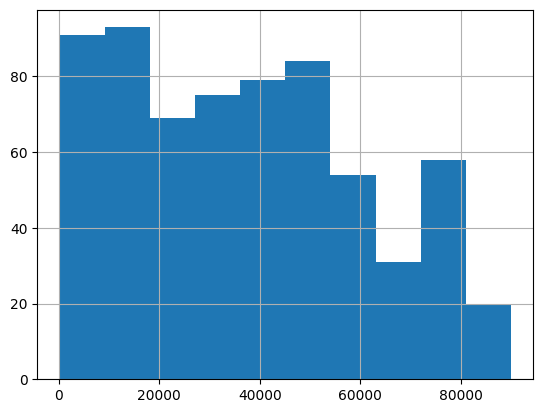

In [2]:
# Lectura del archivo
df_fev = pd.read_csv("FEV_data.csv")
# Información
df_fev.columns
df_fev.subjid.hist()

In [3]:
for i, x in enumerate(df_fev.seqnbr):
    if x != i+1:
        print(f"x: {x},i: {i}")

Cont


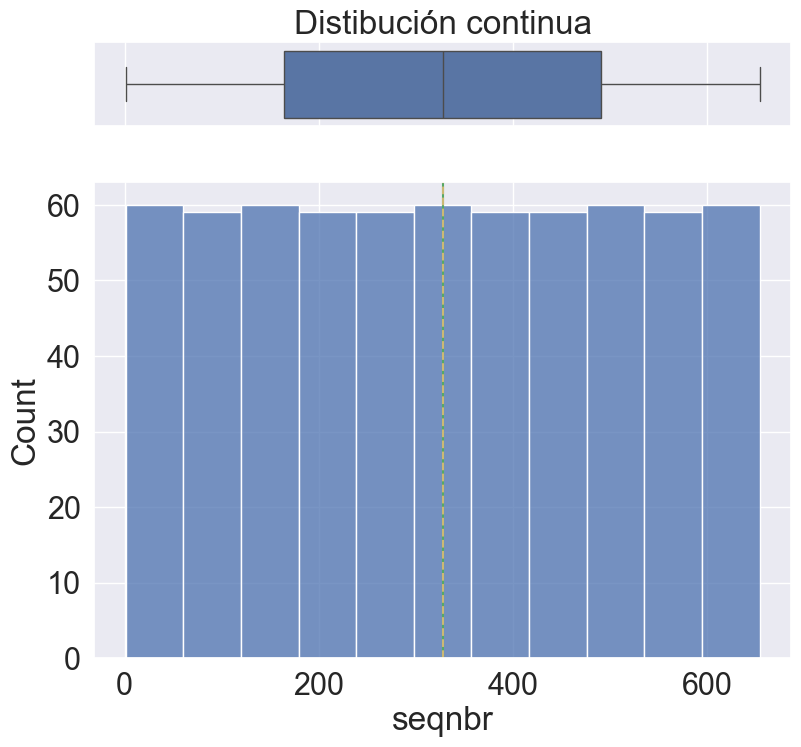

Cont


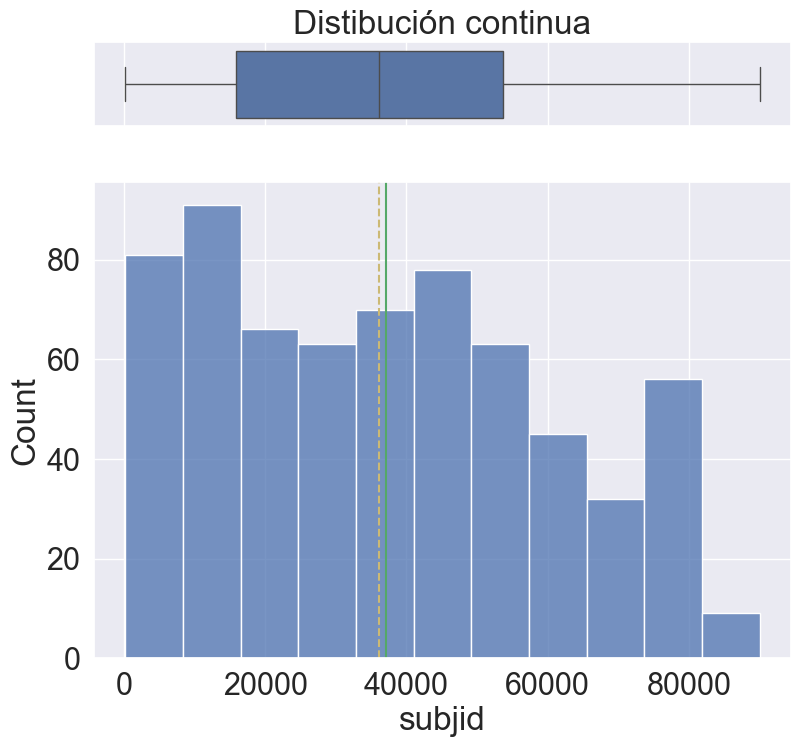

Cont


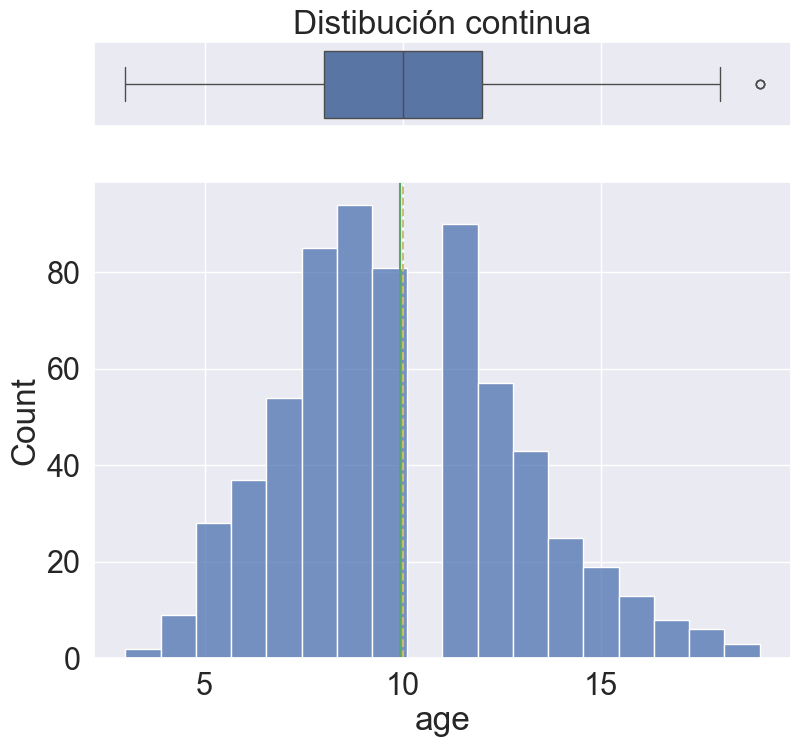

Cont


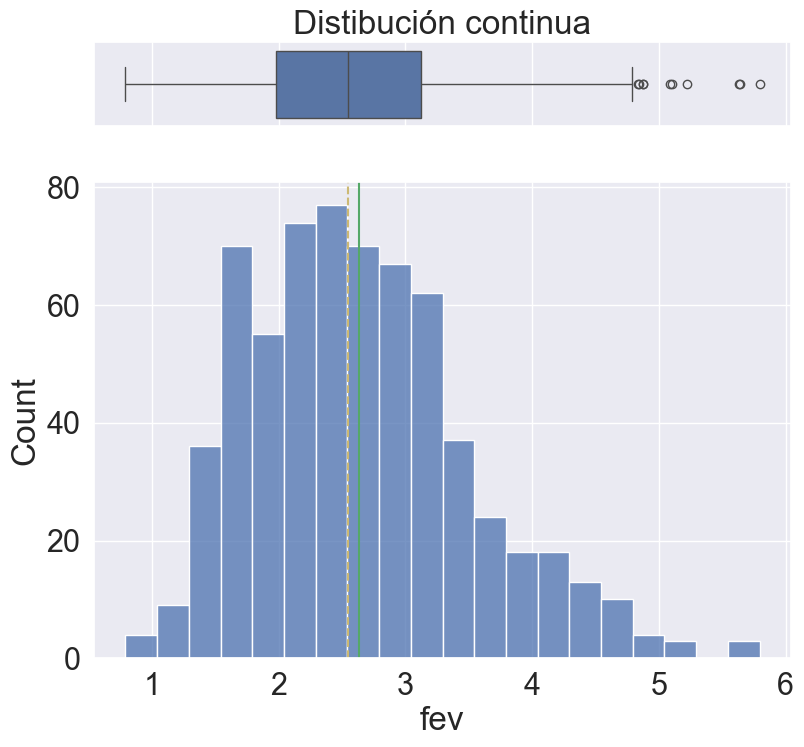

Cont


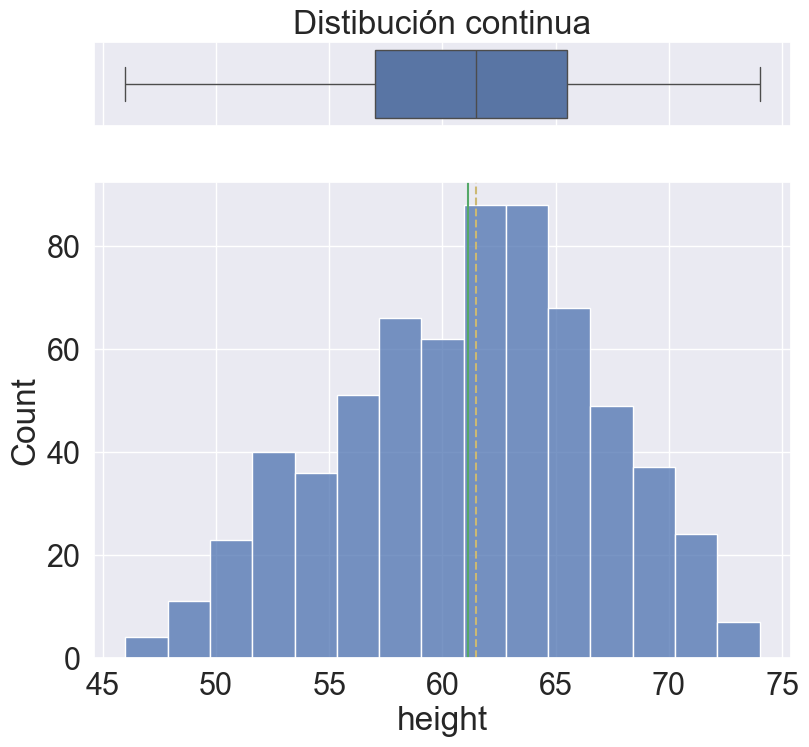

Cont


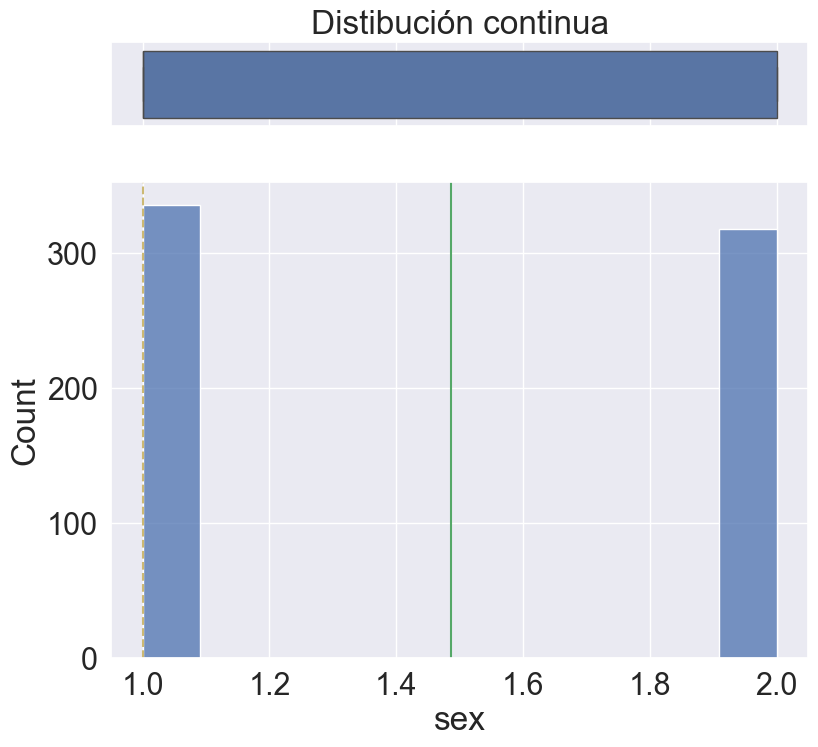

Cont


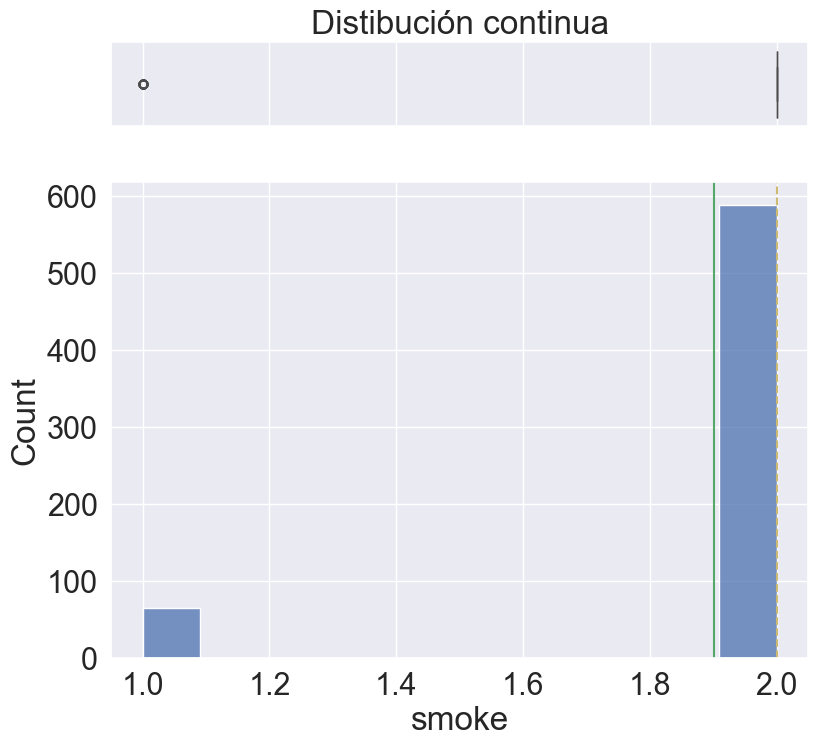

seqnbr    None
subjid    None
age       None
fev       None
height    None
sex       None
smoke     None
dtype: object

In [4]:
df_fev.apply(NuestrasFunciones.plot)

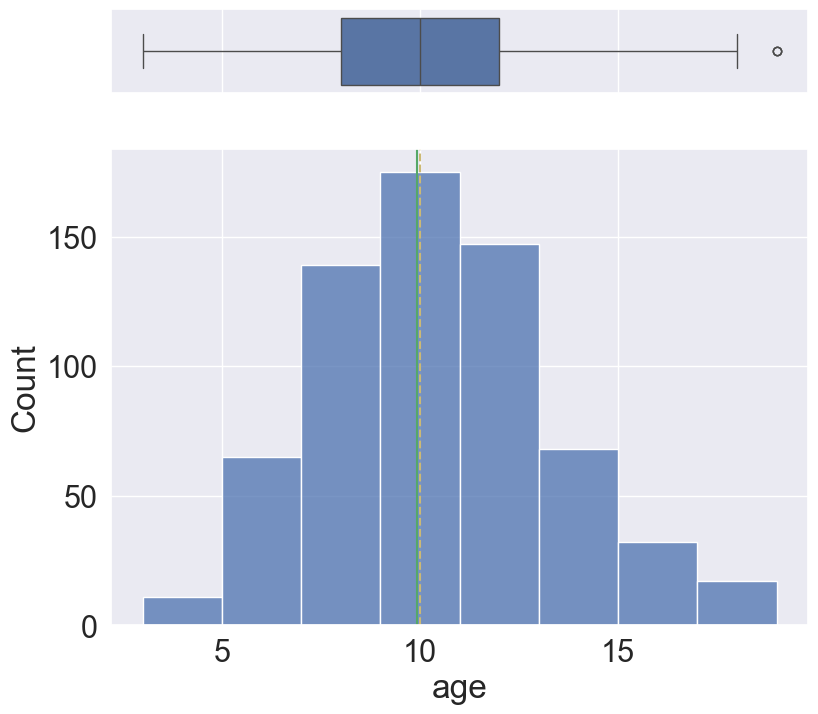

In [5]:
NuestrasFunciones.histogram_boxplot(df_fev.age, bins = 8)

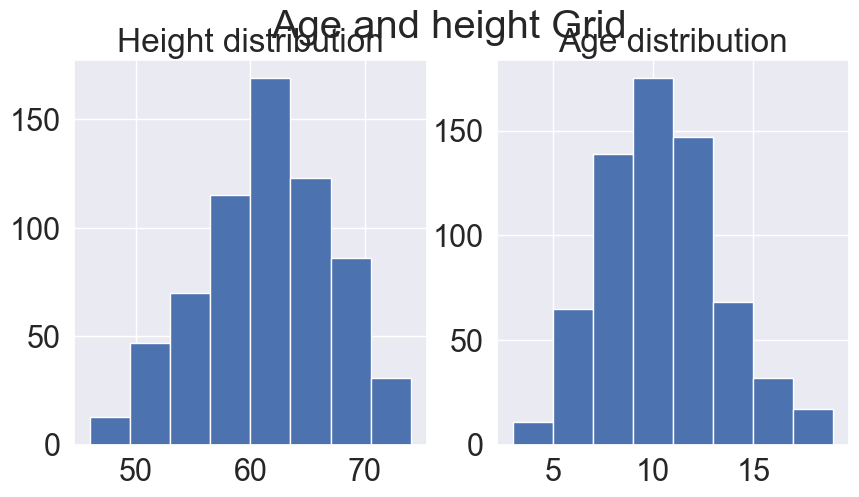

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) 

df_fev.height.hist(bins = 8, ax=axs[0])
axs[0].set_title('Height distribution')

df_fev.age.hist(bins = 8, ax=axs[1])
axs[1].set_title('Age distribution')

fig.suptitle('Age and height Grid')

plt.show()

In [7]:
df_fev.describe()

seqnbr        subjid         age         fev      height  \
count  654.00000    654.000000  654.000000  654.000000  654.000000   
mean   327.50000  37169.571865    9.931193    2.636780   61.143578   
std    188.93782  23690.860350    2.953935    0.867059    5.703513   
min      1.00000    201.000000    3.000000    0.791000   46.000000   
25%    164.25000  15811.000000    8.000000    1.981000   57.000000   
50%    327.50000  36071.000000   10.000000    2.547500   61.500000   
75%    490.75000  53638.500000   12.000000    3.118500   65.500000   
max    654.00000  90001.000000   19.000000    5.793000   74.000000   

              sex       smoke  
count  654.000000  654.000000  
mean     1.486239    1.900612  
std      0.500193    0.299412  
min      1.000000    1.000000  
25%      1.000000    2.000000  
50%      1.000000    2.000000  
75%      2.000000    2.000000  
max      2.000000    2.000000

In [8]:
df_fev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   seqnbr  654 non-null    int64  
 1   subjid  654 non-null    int64  
 2   age     654 non-null    int64  
 3   fev     654 non-null    float64
 4   height  654 non-null    float64
 5   sex     654 non-null    int64  
 6   smoke   654 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 35.9 KB


In [9]:
for val, cnt in df_fev.smoke.value_counts().sort_index().items():
    print(f"{val}--{cnt}")

1--65
2--589


In [10]:
#df_fev.height.value_counts().sort_index()

In [11]:
df_fev.nunique()

seqnbr    654
subjid    654
age        17
fev       575
height     56
sex         2
smoke       2
dtype: int64

¿Cuantos registros y variables tiene el archivo? ¿Tienen las variables el tipo correcto en relación a su lógica naturaleza?

In [12]:
df_fev.columns

Index(['seqnbr', 'subjid', 'age', 'fev', 'height', 'sex', 'smoke'], dtype='object')

**Respuesta**: 

¿Cuantos registros y variables tiene el archivo?

Nuestro archivo contiene 654 registros y 7 variables.

¿Tienen las variables el tipo correcto en relación a su lógica naturaleza?

-La variable seqnbr parece ser el identificador de cada registro, empieza en uno y termina en 654. Es un int-64 y debe permanecer así.
-La variable subjid no sé a qué hace referencia, pero tiene también 654 valores únicos de valores enteros. Debe permanecer como int64
-La variable age hace referencia a la edad de la persona observada en años, aparentemente sin tomar en cuenta valores intermedios.
Debe permanecer como int-64.
-La variable FEV tampoco sé a qué se refiere pero es una variable de carácter continuo. Debe permanecer como float64
- La variable height parece registrar la altura del sujeto observado aparentemente en pulgadas, toma valores enteros
y el punto medio entre dos enteros, se pudiese pasar a int64 pero se perdería información sin necesidad. La variable se debe quedar como 
float 64
- Sex y Smoke son variables dicotómicas que toman valores 2 y 1. Se deben pasar a categóricas pues sólo pueden tomar dos valores.
Para cambiarlas a categórica reemplazaré los valores 1,2 por el tradicional 0,1


In [13]:
df_fev.loc[df_fev.smoke == 1, "smoke"] = 0
df_fev.loc[df_fev.smoke == 2, "smoke"] = 1

df_fev.loc[df_fev.sex == 1, "sex"] = 0
df_fev.loc[df_fev.sex == 2, "sex"] = 1

df_fev.smoke = df_fev.smoke.astype('category')
df_fev.sex = df_fev.sex.astype('category')

In [14]:
df_fev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   seqnbr  654 non-null    int64   
 1   subjid  654 non-null    int64   
 2   age     654 non-null    int64   
 3   fev     654 non-null    float64 
 4   height  654 non-null    float64 
 5   sex     654 non-null    category
 6   smoke   654 non-null    category
dtypes: category(2), float64(2), int64(3)
memory usage: 27.2 KB


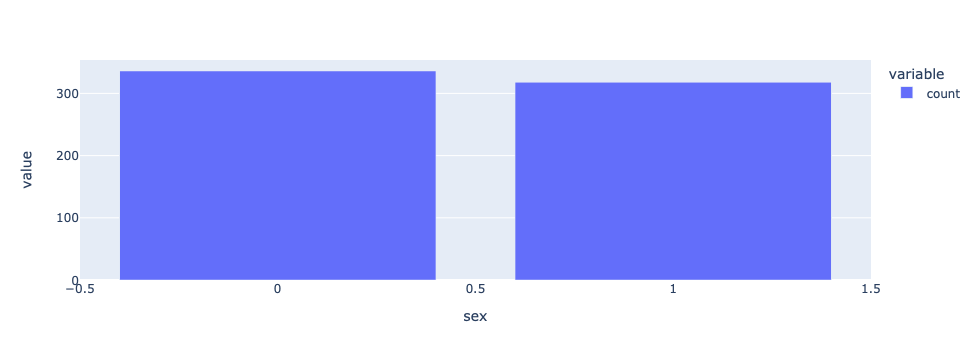

In [15]:
NuestrasFunciones.cat_plot(df_fev.sex)

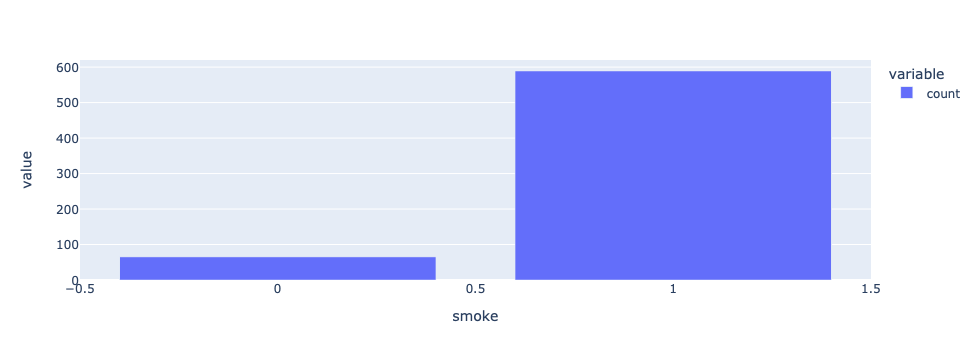

In [16]:
NuestrasFunciones.cat_plot(df_fev.smoke)

## Pregunta 2

Sabiendo que la variable objetivo es *Fev*. Presenta un gráfico con las relaciones de asociación de los predictores frente a Fev. 

In [17]:
#ProfileReport(df_fev) no lo logré :(

In [18]:
#Creo dos variables aleatorias. Así si la correlación de una de ellas con la objetivo es mayor que una de mis variables explicativas
#Sé que debo plantearme si realmente son significativas
#Crearíamos también un prop_missings que contenga el número de missings en la fila, pero este df no contiene missings
df_fev['aleatorio'] = np.random.uniform(0,1,size=df_fev.shape[0])
df_fev['aleatorio2'] = np.random.uniform(0,1,size=df_fev.shape[0])

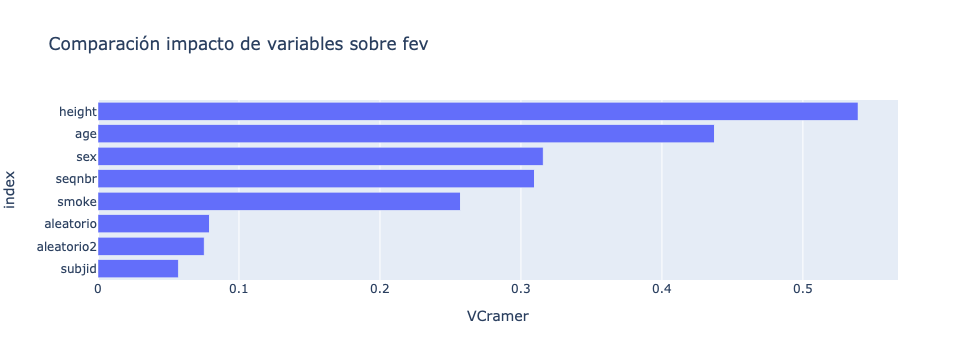

In [19]:
# Gráfico de relaciones con la objetivo
X = df_fev.drop(["fev"], axis = 1)
Y = df_fev.fev
tablaCramer = pd.DataFrame(X.apply(lambda x: NuestrasFunciones.cramers_v(x,Y)),columns=['VCramer'])
px.bar(tablaCramer,x=tablaCramer.VCramer,title='Comparación impacto de variables sobre fev').update_yaxes(categoryorder="total ascending")

Posteriormente transformaré las variables explicativas para determinar si existe una transformación cuya correlación según v de Cramer con la objetivo sea mayor que la original

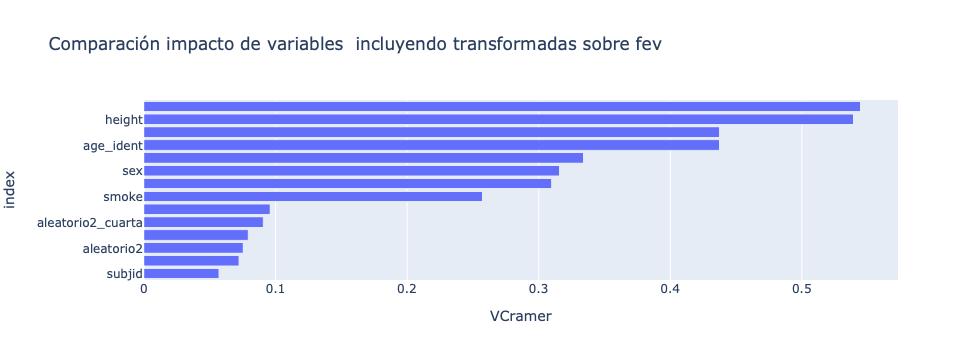

In [20]:
#NuestrasFunciones.mejorTransf()
variables_transf = X.select_dtypes(include=np.number).apply(lambda x: NuestrasFunciones.mejorTransf(x,Y, tipo='cramer'))
variables_transf_names = X.select_dtypes(include=np.number).apply(lambda x: NuestrasFunciones.mejorTransf(x,Y,tipo='cramer', name=True))
variables_transf.columns = variables_transf_names.values
#transf_cramer
variables_transf = variables_transf.join(X.copy())
tablaCramer2 = pd.DataFrame(variables_transf.apply(lambda x: NuestrasFunciones.cramers_v(x,Y)),columns=['VCramer'])

# Obtener el gráfico de importancia de las variables frente a la objetivo continua según vcramer
px.bar(tablaCramer2,x=tablaCramer2.VCramer,title='Comparación impacto de variables  incluyendo transformadas sobre fev').update_yaxes(categoryorder="total ascending").show()







La transformación de variables no tuvo mucho efecto en este caso
La transformación de height a su raíz cuadrada tiene un efecto positivo mínimo en la correlación pero empero la interpretabilidad del modelo.
La transformación de seqnbr a su raíz cuadrada también tuvo un efecto positivo sobre la correlación, pero parece que seqnbr no es más que un identificador de los sujetos observados, los gráficos posteriores se hacen para explorar esta teoría

In [21]:
variables_transf = variables_transf.join(Y.copy())

In [22]:
variables_transf.columns

Index(['seqnbr_sqr', 'subjid_cuarta', 'age_ident', 'height_sqr',
       'aleatorio_log', 'aleatorio2_cuarta', 'seqnbr', 'subjid', 'age',
       'height', 'sex', 'smoke', 'aleatorio', 'aleatorio2', 'fev'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                    fev   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     399.0
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           1.28e-69
Time:                        21:14:32   Log-Likelihood:                -678.07
No. Observations:                 654   AIC:                             1360.
Df Residuals:                     652   BIC:                             1369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7107      0.054     31.970      0.0

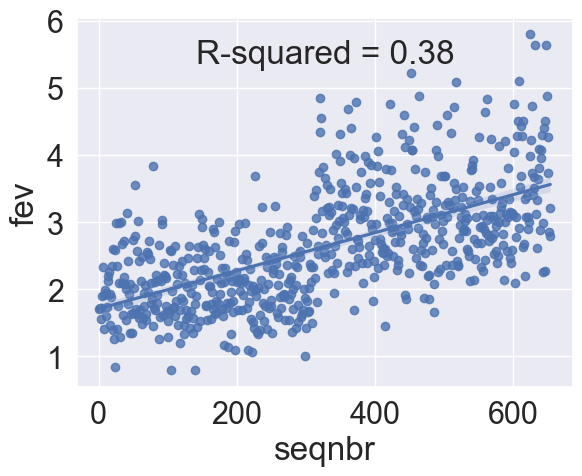

In [23]:
ax = sns.regplot(x='seqnbr', y='fev', data=variables_transf)

predictor = sm.add_constant(variables_transf.seqnbr)
results = sm.OLS(variables_transf["fev"],predictor).fit()
print(results.summary())
ax.text(0.5, 0.9, f'R-squared = {results.rsquared:.2f}', ha='center', va='center', transform=ax.transAxes)
plt.show()


                            OLS Regression Results                            
Dep. Variable:                    fev   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     385.1
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           9.89e-68
Time:                        21:14:32   Log-Likelihood:                -682.42
No. Observations:                 654   AIC:                             1369.
Df Residuals:                     652   BIC:                             1378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0470      0.040     50.748      0.0

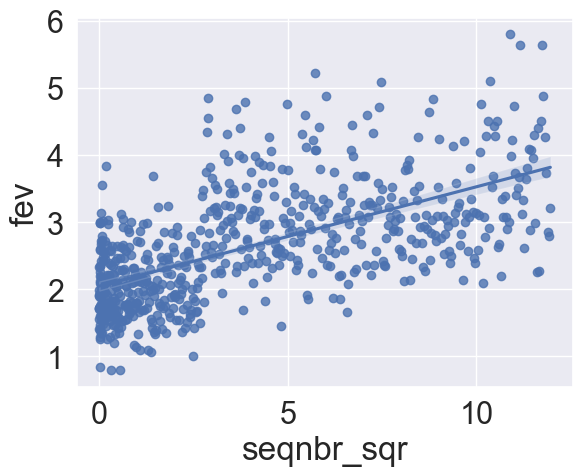

In [24]:
ax2 = sns.regplot(x='seqnbr_sqr', y='fev', data=variables_transf)

predictor2 = sm.add_constant(variables_transf.seqnbr_sqr)
results2 = sm.OLS(variables_transf["fev"],predictor2).fit()
print(results2.summary())
plt.show()

Parece que he de descartar mi hipótesis de que seqnbr no es más que un índice, una regresión lineal de seqnbr_sqr sobre la variable objetivo es capaz de explicar el 38% de la variabilidad de nuestra objetivo por sí sola con un p-valor tanto en la F como en la t statistic bastante significativo

¿Cuales son las 3 variables que elegirías para tu primer modelo de regresión en base a esta información?


Después de ver que la variable seqnbr sí es significativa entra como competidora en las posibles variables a escoger para mi modelo. Sin embargo, al no saber a qué se refiere la variable, prefiero utilizar "sex" pues esta sí es interpretable. 

Las variables explicativas del modelo por lo tanto serían height, age y sex.

O puede que algún modelo con dos de esas variables y su interacción sea aún mejor. Probaremos eso en conjunto con la variableseqnbr_sqr a ver qué pasa.

In [25]:
df_regresion_fev = variables_transf[["height","age","sex","seqnbr_sqr"]]

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
clf = LinearRegression()


# Create interaction terms (interaction of each regressor pair + polynomial)
#Interaction terms need to be created in both the test and train datasets
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
interaction

# Aplicar al dataset
df_fev_inter = pd.DataFrame(interaction.fit_transform(df_regresion_fev), columns=interaction.get_feature_names_out(input_features=df_regresion_fev.columns))
df_fev_inter = df_fev_inter.loc[:, df_fev_inter.var() != 0.0]

el_mejor_modelo = sfs(clf, 
          k_features=3, 
          forward=True, 
          floating=False, 
          scoring='r2',
          cv=5,n_jobs=-1)

el_mejor_modelo = el_mejor_modelo.fit(df_fev_inter, Y)
print(el_mejor_modelo.k_feature_names_)
print(el_mejor_modelo.k_score_)
df_regresion_tres_variables = df_fev_inter[list(el_mejor_modelo.k_feature_names_)]


('height', 'age', 'height age')
0.6604288362419496


**Respuesta**:
Las variables que escogería para mi modelo serían height, age y su interacción.


## Pregunta 3

Ajusta el modelo de regresión que contiene los 3 predictores que has decidido en el apartado anterior en el propio conjunto de entrenamiento (no hace falta hacer partición) y muestra el summary de dicho modelo. 

In [27]:
# Ajuste de modelo 
predictor = sm.add_constant(df_regresion_tres_variables)
model = sm.OLS(Y,X).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    fev   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              2488.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):                        0.00
Time:                        21:14:34   Log-Likelihood:                         -464.29
No. Observations:                 654   AIC:                                      944.6
Df Residuals:                     646   BIC:                                      980.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
seqnbr         0.0011      0.000      5.218      0.000       0.001       0.002
subjid     -4.647e-06   1.06e-06     -4.378      0.000   -6.73e-06   -2.56e-06
age            0.0870      0.015      5.686      0.000       0.057       0.117
height         0.0327      0.003     11.771      0.000       0.027       0.038
sex           -0.3164      0.038     -8.261      0.000      -0.392      -0.241
smoke         -0.1768      0.069     -2.571      0.010      -0.312      -0.042
aleatorio     -0.1532      0.067     -2.273      0.023      -0.286      -0.021
aleatorio2    -0.0266      0.066     -0.401      0.689      -0.157       0.104
==============================================================================
Omnibus:                       29.056   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.788
Skew:                           0.399   Prob(JB):                     2.29e-09
Kurtosis:                       3.908   Cond. No.                     1.59e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
"""
Los otros modelos tentativos:

reg_aburrida1 = variables_transf[["height","age","seqnbr_sqr"]]
reg_aburrida2 = variables_transf[["height","age","sex"]]

reg_aburrida1 = sm.add_constant(reg_aburrida1)
reg_aburrida1 = sm.OLS(Y,reg_aburrida1).fit()
print(reg_aburrida1.summary())
#Tira una regresión lineal de peor R^2 y con seqnbr_sqr como no significativo

reg_aburrida2 = sm.add_constant(reg_aburrida2)
reg_aburrida2 = sm.OLS(Y,reg_aburrida2).fit()
print(reg_aburrida2.summary())
#Tira una regresión lineal de peor R^2 pero con intersección siginificativa 


"""

'\nLos otros modelos tentativos:\n\nreg_aburrida1 = variables_transf[["height","age","seqnbr_sqr"]]\nreg_aburrida2 = variables_transf[["height","age","sex"]]\n\nreg_aburrida1 = sm.add_constant(reg_aburrida1)\nreg_aburrida1 = sm.OLS(Y,reg_aburrida1).fit()\nprint(reg_aburrida1.summary())\n#Tira una regresión lineal de peor R^2 y con seqnbr_sqr como no significativo\n\nreg_aburrida2 = sm.add_constant(reg_aburrida2)\nreg_aburrida2 = sm.OLS(Y,reg_aburrida2).fit()\nprint(reg_aburrida2.summary())\n#Tira una regresión lineal de peor R^2 pero con intersección siginificativa \n\n\n'

 A la vista de los valores de ajuste, ¿qué porcentaje de variabilidad explicada tiene el modelo? Interpreta el parámetro estimado de la *altura*.

**Respuesta**:

El porcentaje de variablididad explicada por el modelo es de 79%.

El parametro altura significa que por cada aumento unitario de altura (supongo que en pulgadas), el fev subirá en 0.0458 unidades.

Pero al tener un efecto interacción positivo con age, podemos ver que el efecto que tiene la altura en el fev se ve positivamente afectado por la edad del sujeto.

Por cada aumento unitario de Altura manteniendo la edad constante será de 0.0458 + edad*0.0075

## Pregunta 4

Aplica validación cruzada repetida para tu modelo con nuestra querida función *cross_val_lin* y una semilla conformada por los 4 últimos dígitos de tu documento de identidad. Muestra el boxplot de sesgo-varianza de las estimaciones. 

In [29]:
df_regresion_tres_variables.rename(columns = {"height age": "height_age"}, inplace = True)
df_regresion_tres_variables.columns
df_regresion_cross_val = df_regresion_tres_variables.join(Y)
#print(df_regresion_cross_val)
                 

In [30]:
# Validación cruzada
formula = "fev ~ height + age + height_age"
NuestrasFunciones.cross_val_lin(formula = formula, data = df_regresion_cross_val ,seed = 7211)
# Boxplot sesgo-varianza


Modelo: fev ~ height + age + height_age
Coeficiente de determinación R2: 0.783 (0.037)


array([0.818274  , 0.78267357, 0.76673082, 0.79756643, 0.74284404,
       0.71764555, 0.7539743 , 0.82933356, 0.81289158, 0.81636162,
       0.79885911, 0.74955365, 0.81338283, 0.75783709, 0.80029497,
       0.77925502, 0.71816342, 0.79743687, 0.78918389, 0.81444653,
       0.77772899, 0.83588471, 0.7633984 , 0.78490867, 0.75673963,
       0.82064466, 0.82371836, 0.70199693, 0.79621419, 0.7617957 ,
       0.74023197, 0.79870206, 0.79383586, 0.84185097, 0.74179591,
       0.80985505, 0.79839815, 0.77611173, 0.74256566, 0.8072716 ,
       0.74167582, 0.82382096, 0.75196555, 0.83251735, 0.77289298,
       0.65495255, 0.84251997, 0.784888  , 0.76672918, 0.84280059,
       0.75930014, 0.74897728, 0.80030919, 0.78520407, 0.81906095,
       0.79570143, 0.82154654, 0.74843273, 0.80694699, 0.76871069,
       0.79366677, 0.71664169, 0.78926393, 0.77241842, 0.8226358 ,
       0.81313154, 0.7690562 , 0.80786577, 0.7052303 , 0.82678746,
       0.75999275, 0.7727658 , 0.79720316, 0.77739212, 0.81297

A la vista de los resultados. ¿Está sobreajustando tu modelo al conjunto de entrenamiento?


**Respuesta**:



Mi conjunto de entrenamiento no parece estar ajustando. Tiene un R^2 medio de 0.783, con una desviación estándar de 0.037.
Los resultados no son mucho peores que el modelo original sin validación cruzada cuyo R^2 era de 0.79

## Pregunta 5

Indica el código necesario para leer el conjunto de datos **"IPI_Esp.xlsx"** y muestra su cabeza.

In [31]:
# Lectura de datos IPI
df_IPI = pd.read_excel("IPI_Esp.xlsx")
# Primeras filas
df_IPI.head()

Date  IPI Nacional
0      1975M01        70.658
1      1975M02        72.180
2      1975M03        75.732
3      1975M04        74.844
4      1975M05        74.210

## Pregunta 6

Convierte el conjunto en una serie temporal legible para Python y representa gráficamente la evolución. 

In [32]:
# Conversión a serie temporal legible
df_IPI.Date

0          1975M01
1          1975M02
2          1975M03
3          1975M04
4          1975M05
          ...     
534        2019M07
535        2019M08
536        2019M09
537        2019M10
538        2019M11
Name: Date, Length: 539, dtype: object

In [33]:
fechas = pd.date_range(start='1/1/1975',end = "12/2019", freq = "M")
fechas

DatetimeIndex(['1975-01-31', '1975-02-28', '1975-03-31', '1975-04-30',
               '1975-05-31', '1975-06-30', '1975-07-31', '1975-08-31',
               '1975-09-30', '1975-10-31',
               ...
               '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30'],
              dtype='datetime64[ns]', length=539, freq='M')

In [34]:
# Convertir en date-time
df_IPI["Date"] = fechas
df_IPI.set_index("Date",inplace=True)
df_IPI.rename(columns = {"IPI Nacional": "IPI_Nacional"}, inplace = True)

In [35]:
# Mostrar valores de serie
df_IPI

IPI_Nacional
Date                    
1975-01-31        70.658
1975-02-28        72.180
1975-03-31        75.732
1975-04-30        74.844
1975-05-31        74.210
...                  ...
2019-07-31       114.698
2019-08-31        85.929
2019-09-30       106.408
2019-10-31       114.592
2019-11-30       108.464

[539 rows x 1 columns]

<Axes: xlabel='Date'>

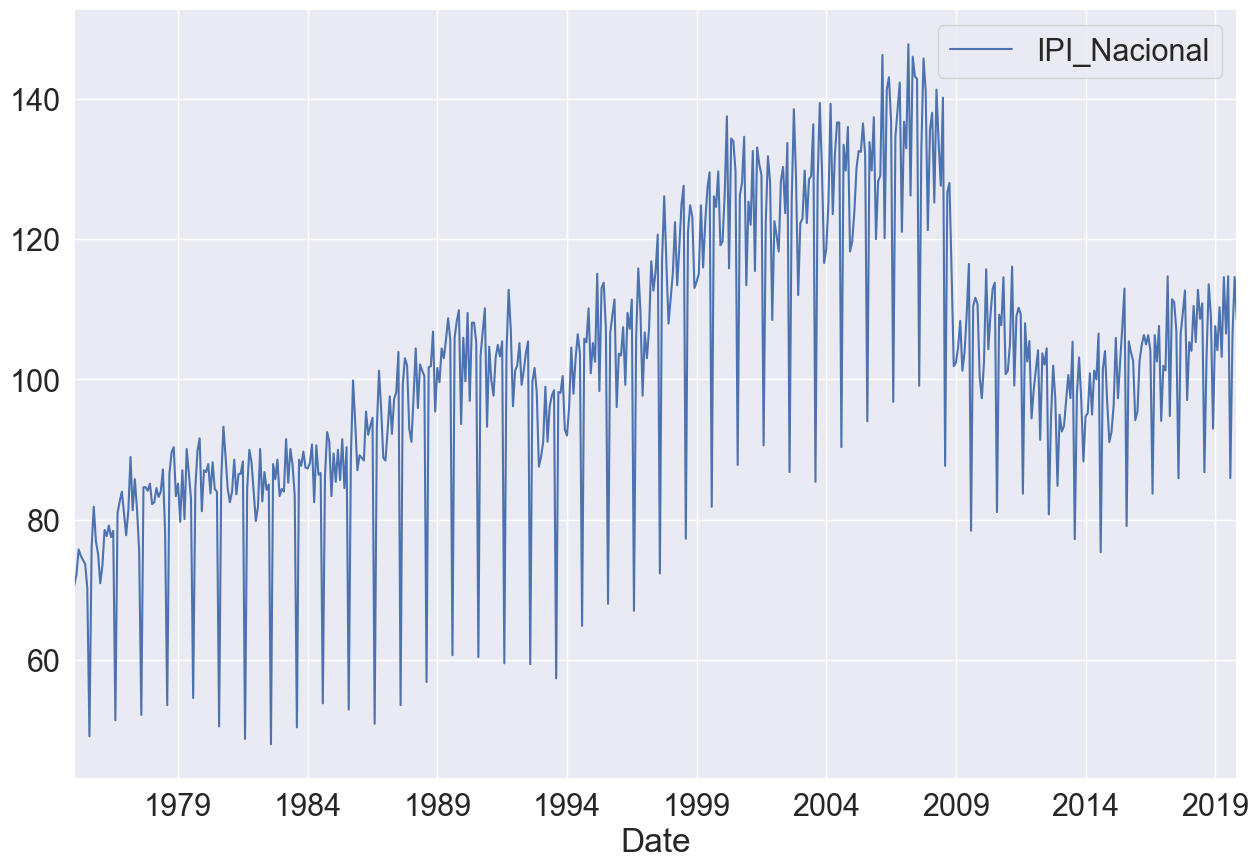

In [36]:
# Gráfico de evolución del IPI
plt.rcParams["figure.figsize"] = (15,10)
df_IPI.plot()

¿Qué componentes de la serie se pueden intuir en el gráfico?

**Respuesta**:
-Se puede ver una muy fuerte estacionalidad, una estacionalidad que parece ser constante hasta la crisis del 2008
-Se puede observar una tendencia positiva hasta la crisis del 2008.
-Si no fuese por los datos posteriores a 2008 estaríamos frente a una serie relativamente homoesquedástica, pero la varianza de los datos posteriores a 2008 es mucho menor que aquella anterior a la crisis.

Tendría sentido hacer un análisis multivariante con alguna variable que ayude a explicar la caida por la crisis del 2008

## Pregunta 7

Toma una partición con ventana de entrenamiento (todo el histórico hasta diciembre de 2017) y prueba (2018 y 2019). Ajusta el modelo de suavizado que consideres más adecuado a la luz de las características de la serie. Evalua el modelo en términos de error y adecuación de los residuos. ¿El modelo satisface las condiciones residuales en cuanto a  autocorrelaciones?

In [37]:
# Para saber qué modelo de suavizado utilizar debo primero revisar la estacionalidad de la serie temporal


In [38]:
print("Como ya habíamos visto, la serie sin descomponer no es estacionaria")
NuestrasFunciones.test_stationarity(df_IPI)

Como ya habíamos visto, la serie sin descomponer no es estacionaria
Results of Dickey-Fuller Test:
Test Statistic                  -1.781256
p-value                          0.389807
#Lags Used                      19.000000
Number of Observations Used    519.000000
Critical Value (1%)             -3.443013
Critical Value (5%)             -2.867125
Critical Value (10%)            -2.569745
dtype: float64


Resultados del modelo multiplicativo:
Results of Dickey-Fuller Test:
Test Statistic                  -4.618885
p-value                          0.000119
#Lags Used                      16.000000
Number of Observations Used    510.000000
Critical Value (1%)             -3.443237
Critical Value (5%)             -2.867224
Critical Value (10%)            -2.569797
dtype: float64


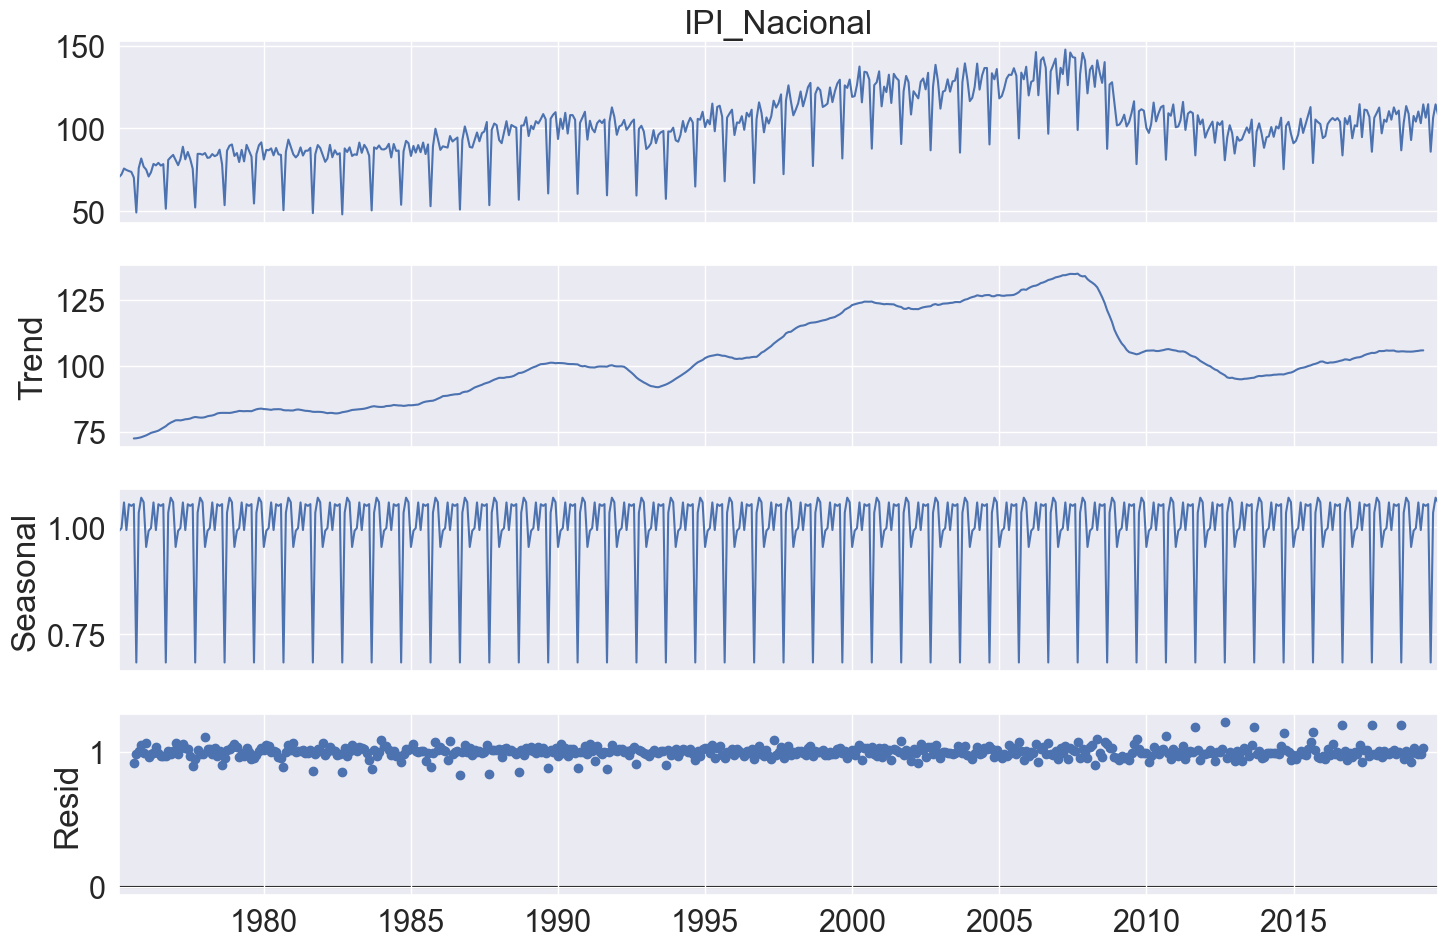

In [39]:
#Revisaremos ahora la estacionaridad de los modelos aditivos y multiplicativos
df_IPI_descomp_multip = seasonal_decompose(df_IPI['IPI_Nacional'], model='multiplicative',period=12)
print("Resultados del modelo multiplicativo:")
NuestrasFunciones.test_stationarity(df_IPI_descomp_multip.resid.dropna())
df_IPI_descomp_multip.plot()
plt.show()

Resultados del modelo aditivo:
Results of Dickey-Fuller Test:
Test Statistic                -7.667143e+00
p-value                        1.629782e-11
#Lags Used                     1.500000e+01
Number of Observations Used    5.110000e+02
Critical Value (1%)           -3.443212e+00
Critical Value (5%)           -2.867213e+00
Critical Value (10%)          -2.569791e+00
dtype: float64


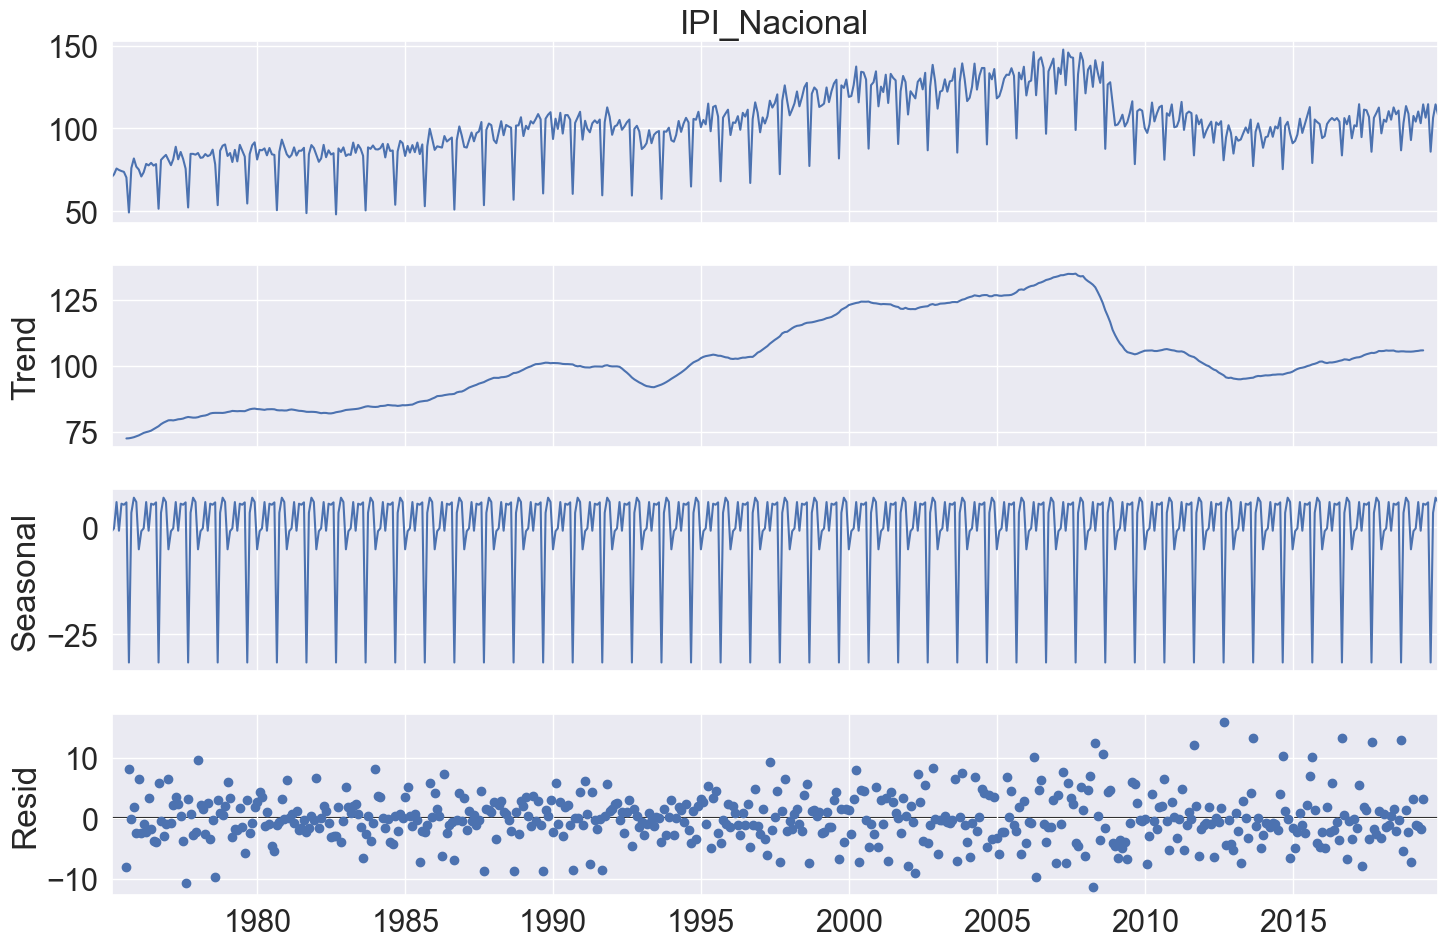

In [40]:
df_IPI_descomp_adi = seasonal_decompose(df_IPI['IPI_Nacional'], model='additive',period=12)
print("Resultados del modelo aditivo:")
NuestrasFunciones.test_stationarity(df_IPI_descomp_adi.resid.dropna())
df_IPI_descomp_adi.plot()
plt.show()

De estos aquel con el menor test statistic es el modelo aditivo. Este lo desarrollaré a mayor profundidad, estabilizando la varianza utilizando como variable el log del IPI en vez del IPI normal

Resultados del modelo aditivo utilizando el logaritmo de IPI:
Results of Dickey-Fuller Test:
Test Statistic                -7.699020e+00
p-value                        1.354898e-11
#Lags Used                     1.400000e+01
Number of Observations Used    5.120000e+02
Critical Value (1%)           -3.443187e+00
Critical Value (5%)           -2.867202e+00
Critical Value (10%)          -2.569785e+00
dtype: float64


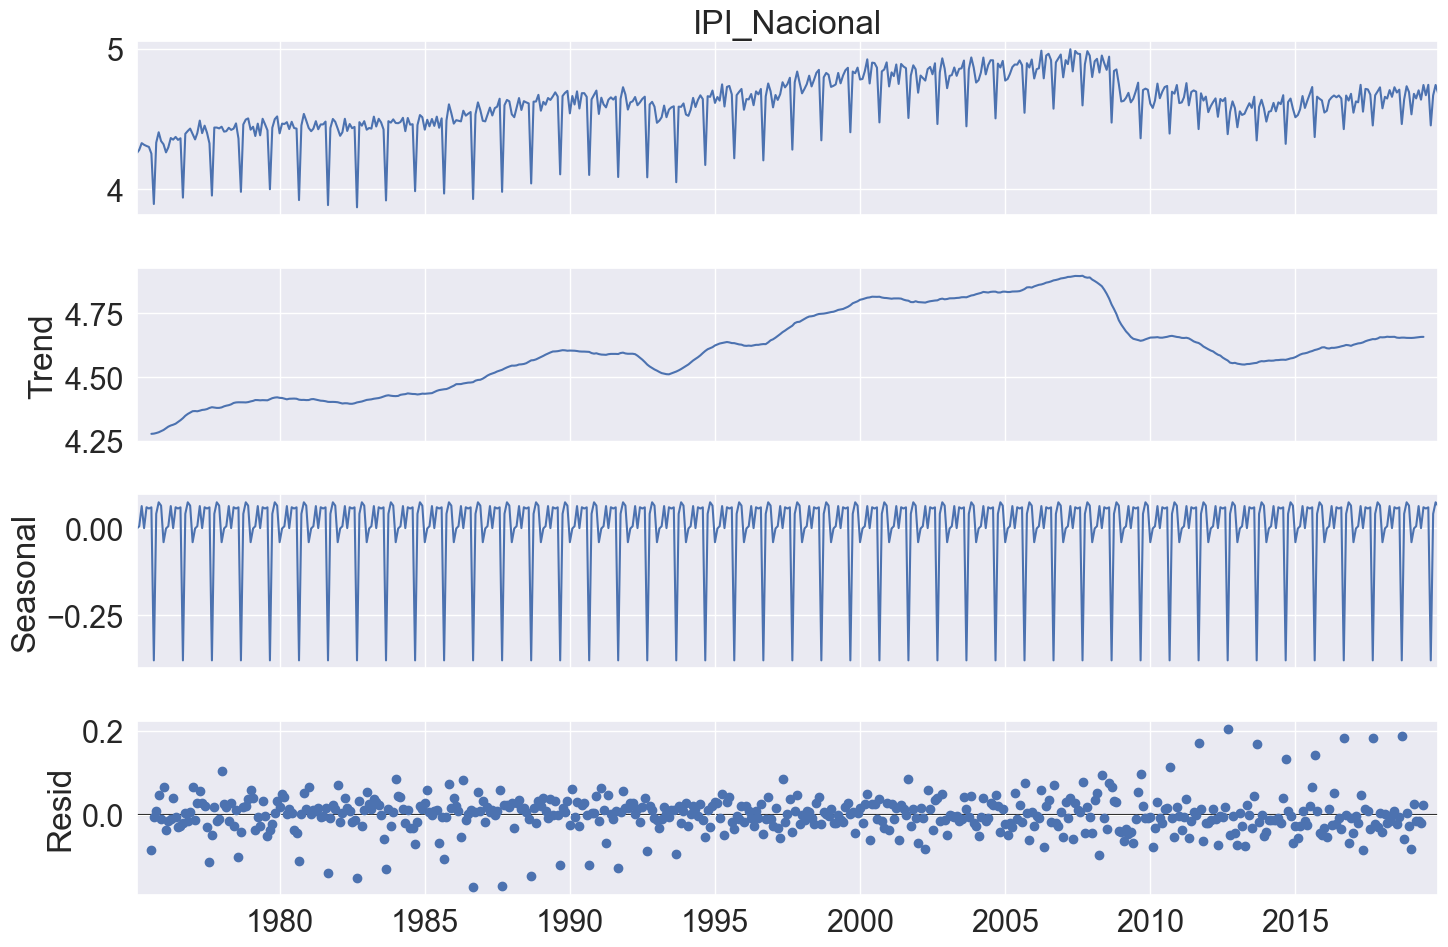

In [41]:
df_IPI_descomp_adi_log = seasonal_decompose(np.log(df_IPI['IPI_Nacional']), model='additive',period=12)
print("Resultados del modelo aditivo utilizando el logaritmo de IPI:")
NuestrasFunciones.test_stationarity(df_IPI_descomp_adi_log.resid.dropna())
df_IPI_descomp_adi_log.plot()
plt.show()

El aditivo con logaritmo mejora poco

Resultados del modelo multiplicativo utilizando el logaritmo de IPI:
Results of Dickey-Fuller Test:
Test Statistic                -7.486073e+00
p-value                        4.635498e-11
#Lags Used                     1.400000e+01
Number of Observations Used    5.120000e+02
Critical Value (1%)           -3.443187e+00
Critical Value (5%)           -2.867202e+00
Critical Value (10%)          -2.569785e+00
dtype: float64


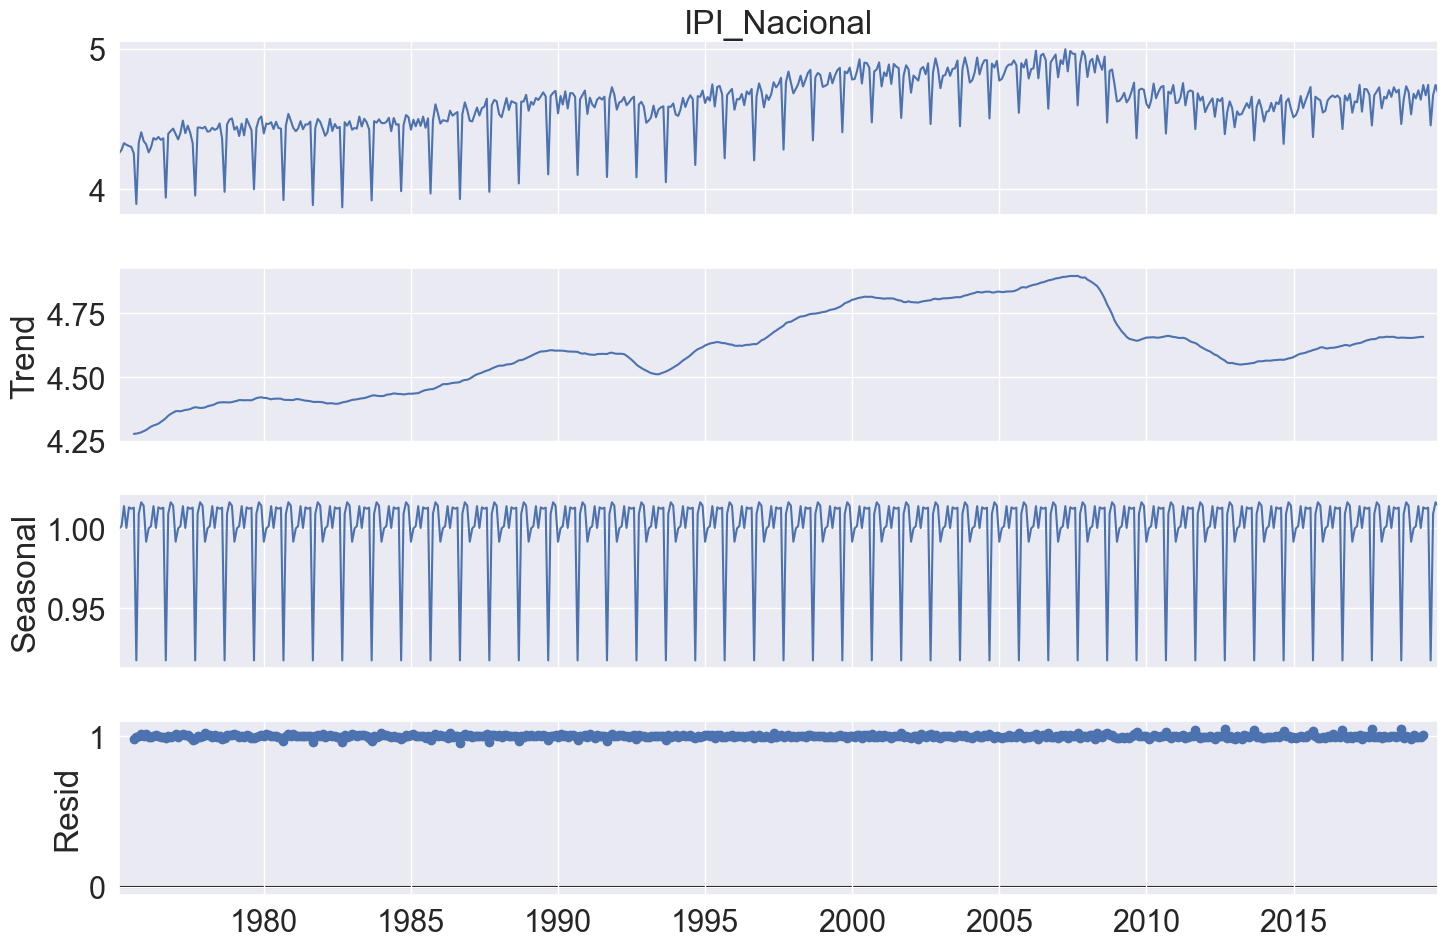

In [42]:
df_IPI_descomp_multi_log = seasonal_decompose(np.log(df_IPI['IPI_Nacional']), model='multiplicative',period=12)
print("Resultados del modelo multiplicativo utilizando el logaritmo de IPI:")
NuestrasFunciones.test_stationarity(df_IPI_descomp_multi_log.resid.dropna())
df_IPI_descomp_multi_log.plot()
plt.show()

El multiplicativo con logaritmo mejora más que el aditivo con logaritmo

La mejor descomposición es la aditiva con logaritmo, pero es sólo poco mejor que la aditiva normal

In [43]:
df_IPI

IPI_Nacional
Date                    
1975-01-31        70.658
1975-02-28        72.180
1975-03-31        75.732
1975-04-30        74.844
1975-05-31        74.210
...                  ...
2019-07-31       114.698
2019-08-31        85.929
2019-09-30       106.408
2019-10-31       114.592
2019-11-30       108.464

[539 rows x 1 columns]

In [44]:
# Partición de datos
import statsmodels.tsa.holtwinters as ets
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

df_IPI_tr = df_IPI[:'2017-12-31']
df_IPI_tst = df_IPI['2018-01-31':]


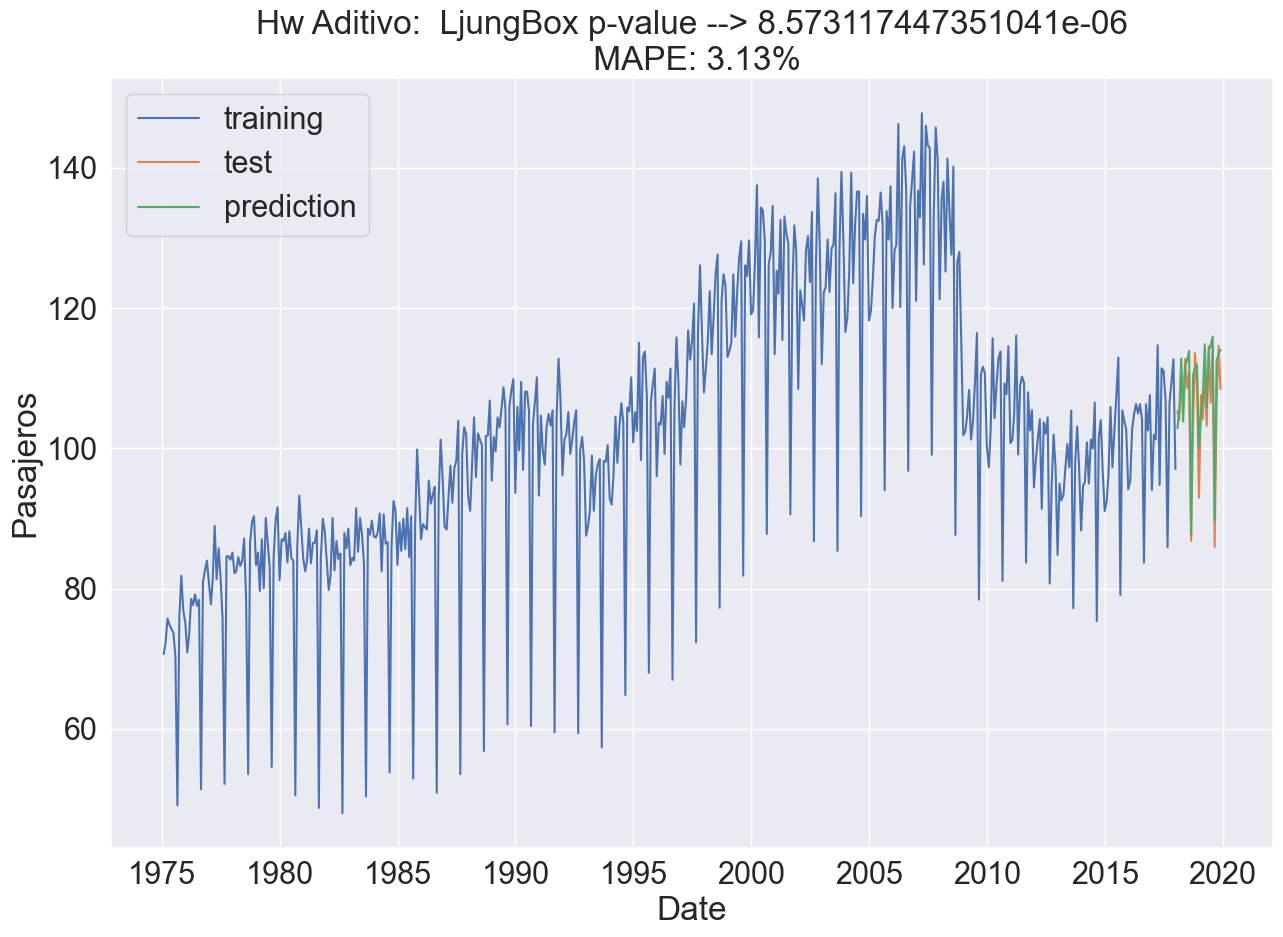

8.573117447351041e-06


In [45]:
#Para probar modelos de suavizado no incluiré ni el modelo simple ni el de Holt debido a la obvia presencia de estacionalidad
holtwinters_add = ets.ExponentialSmoothing(df_IPI_tr,trend='add', damped_trend=False, seasonal='add',use_boxcox = True).fit()
NuestrasFunciones.eval_model(holtwinters_add,df_IPI_tr,df_IPI_tst,'Hw Aditivo')
#holtwinters_add.summary()

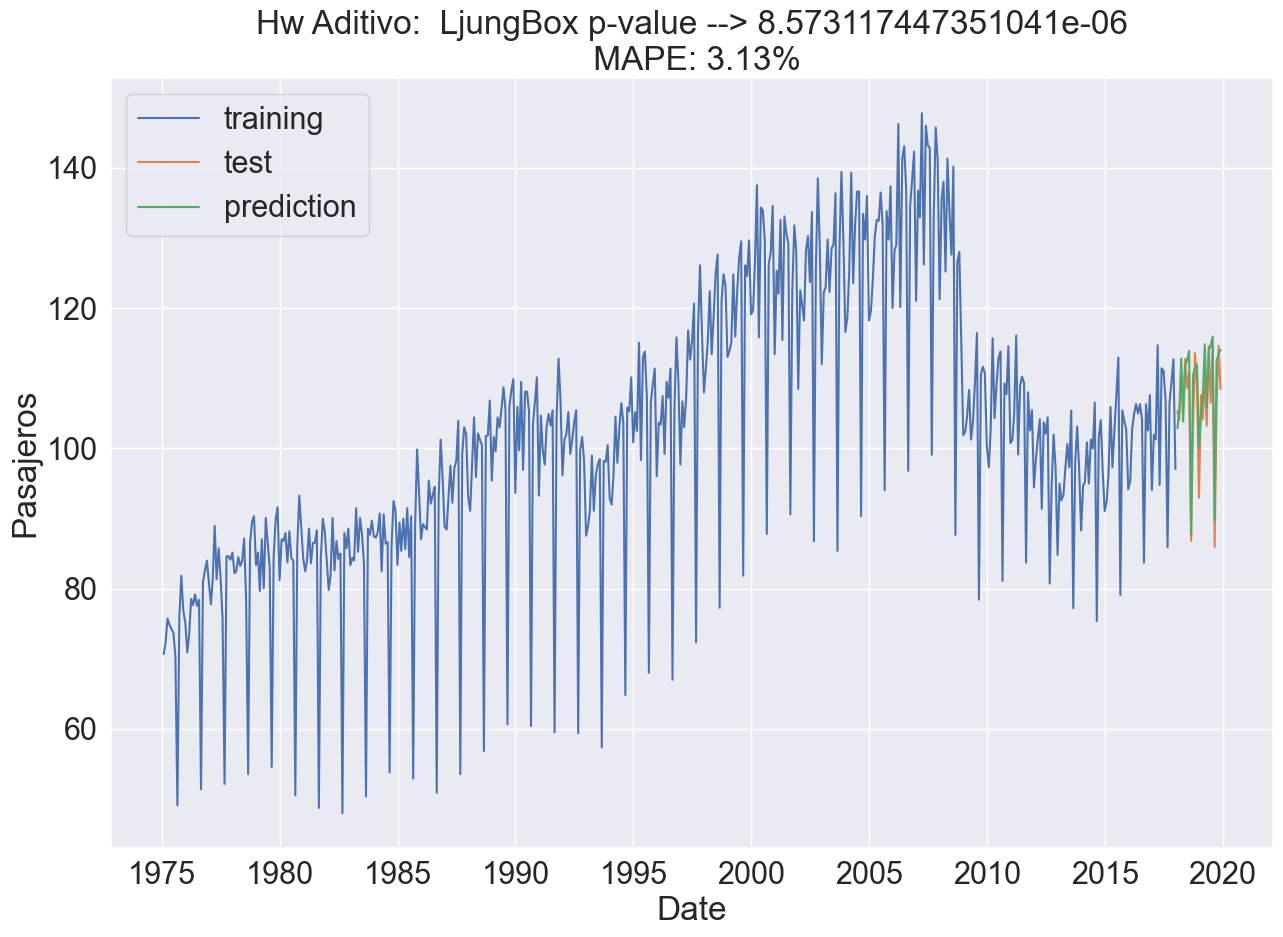

8.573117447351041e-06


In [46]:
holtwinters_multi = ets.ExponentialSmoothing(df_IPI_tr,trend='mul', damped_trend=False, seasonal='mul',use_boxcox = True).fit()
NuestrasFunciones.eval_model(holtwinters_add,df_IPI_tr,df_IPI_tst,'Hw Aditivo')

**Respuesta**:
Los modelos aditivos y multiplicativos logran captar la serie temporal y producen MAPE bajo, pero ambos fallan el test de ljungBox, teniendo ambos un p-valor menor a 0.05 incluso después de aplicar la transformación de Box-Cox

## Pregunta 8

Presenta los correlogramas simple y parcial de la serie diferenciada en lo regular y estacional para el conjunto de entrenamiento. 

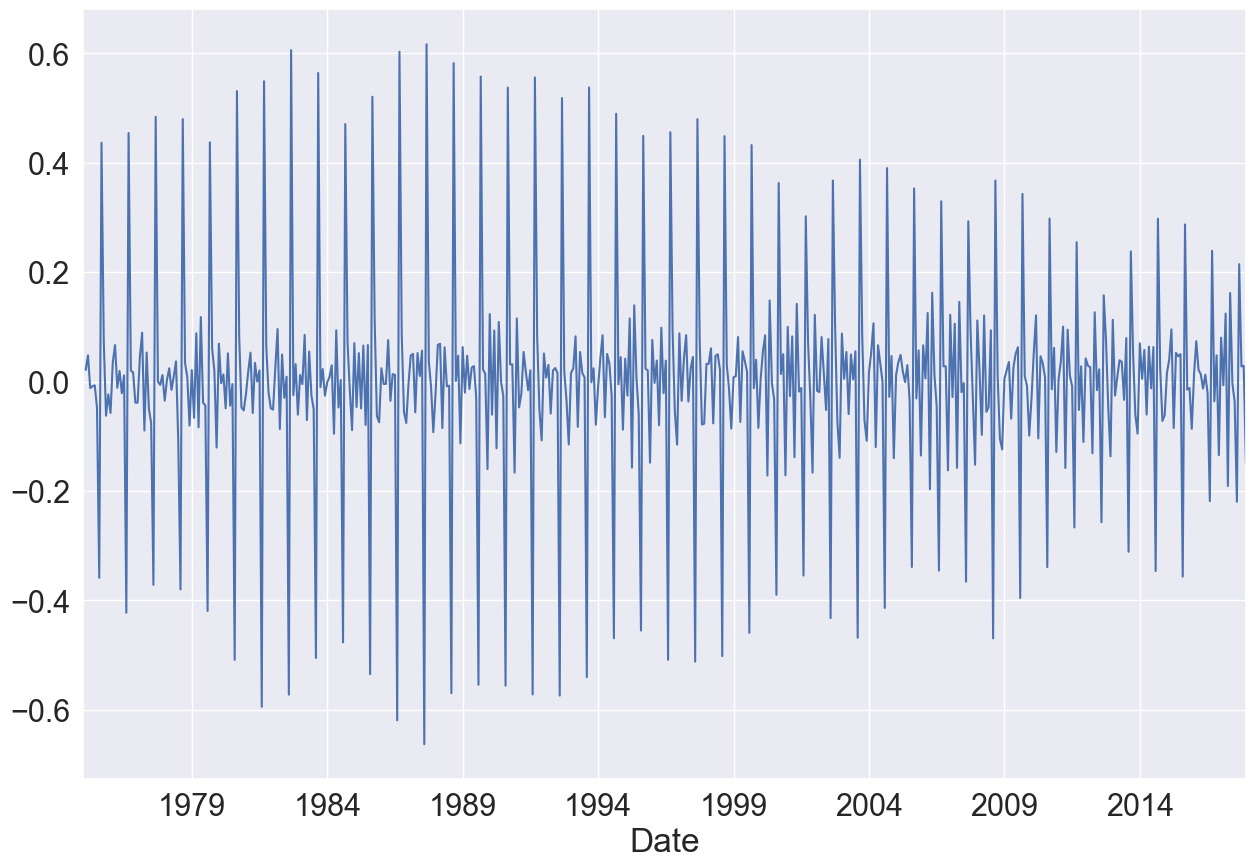

In [47]:
# Diferenciar serie
#Aplicaré también la transformación de Box-Cox en búsqueda de mejores resultados
IPI_log_tr = np.log(df_IPI_tr['IPI_Nacional'])
IPI_log_tst = np.log(df_IPI_tst['IPI_Nacional'])

Ipi_log_diff_1_tr = IPI_log_tr.diff(periods=1)
Ipi_log_diff_1_12_tr = Ipi_log_diff_1_tr.diff(periods=12)
Ipi_log_diff_1_tr.plot()
plt.show()

<Axes: xlabel='Date'>

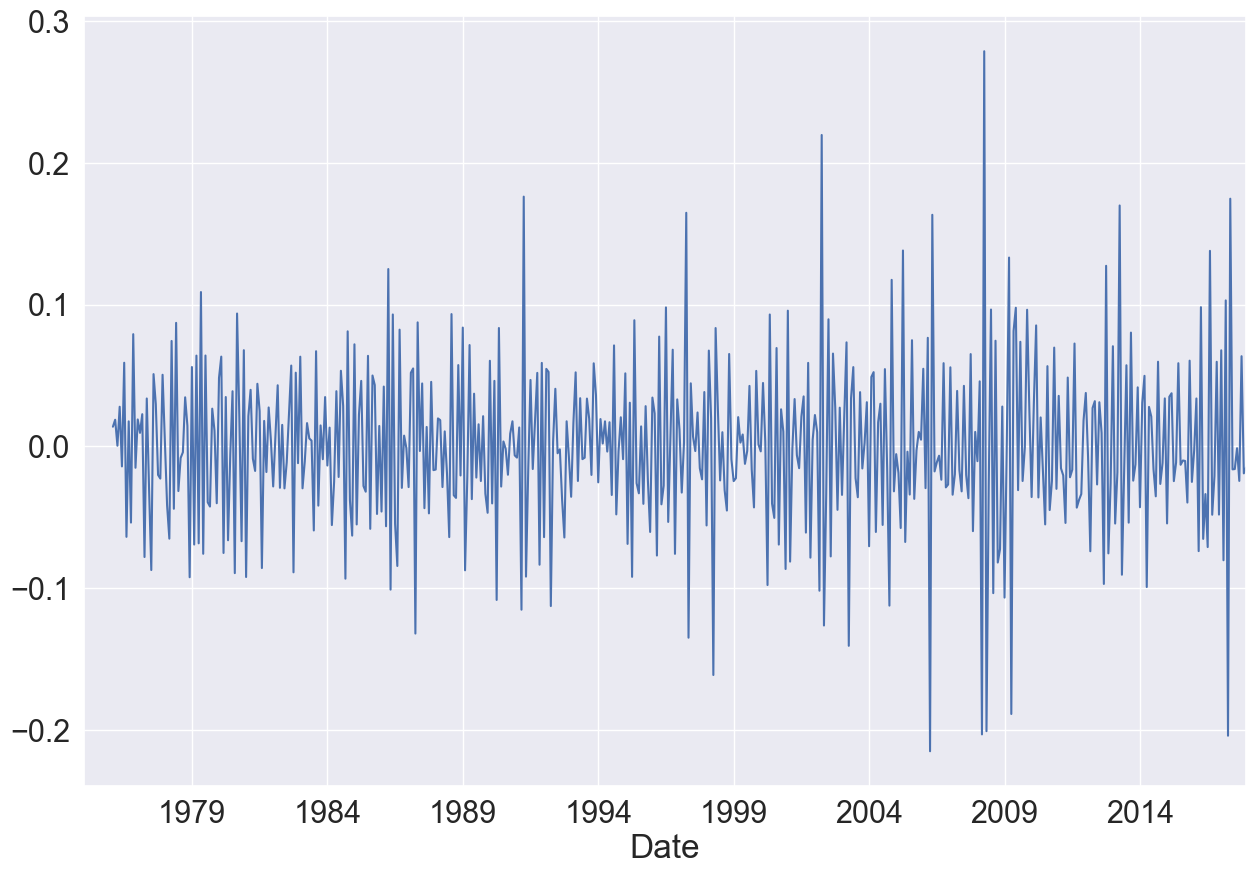

In [48]:
Ipi_log_diff_1_12_tr.plot()

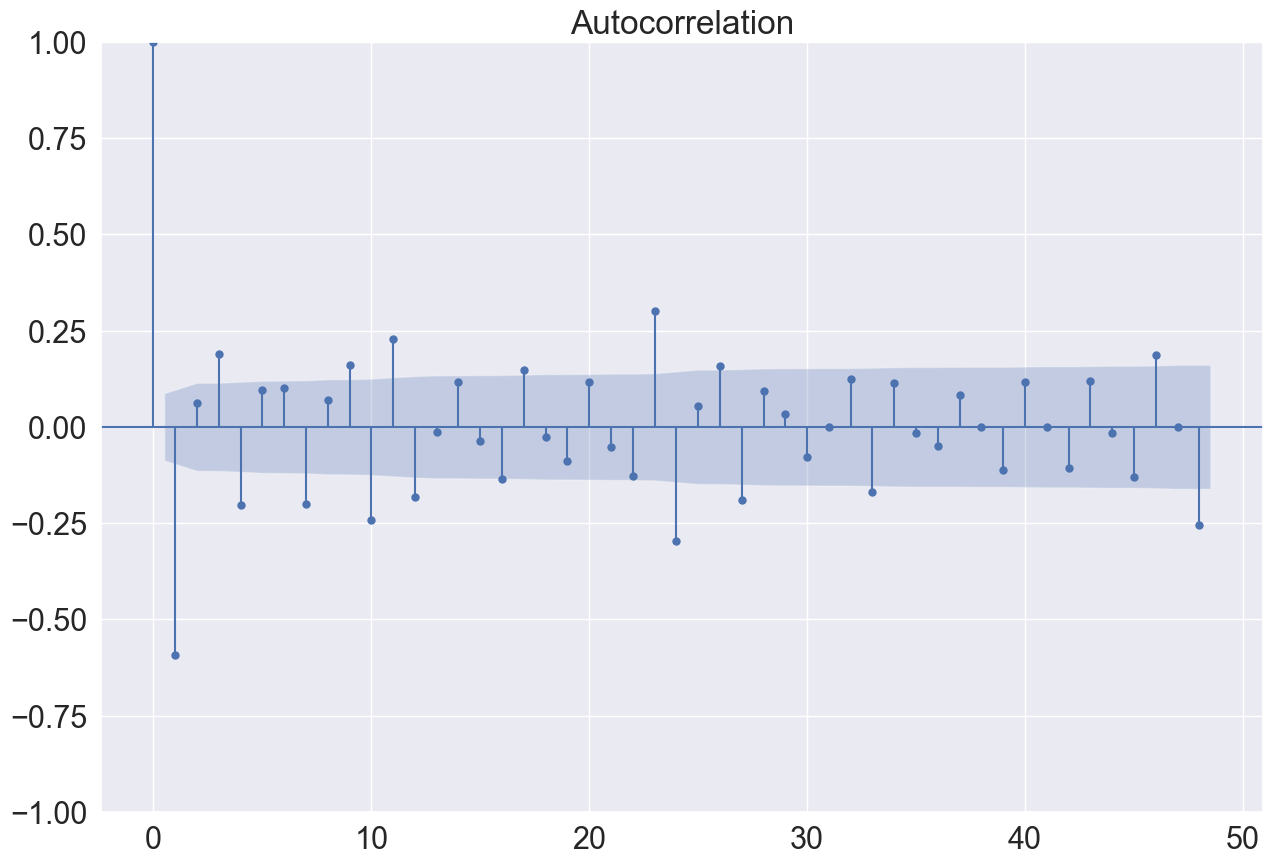

In [49]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Correlograma simple ACF
plot_acf(Ipi_log_diff_1_12_tr.dropna(inplace=False), lags = 48)
plt.show()

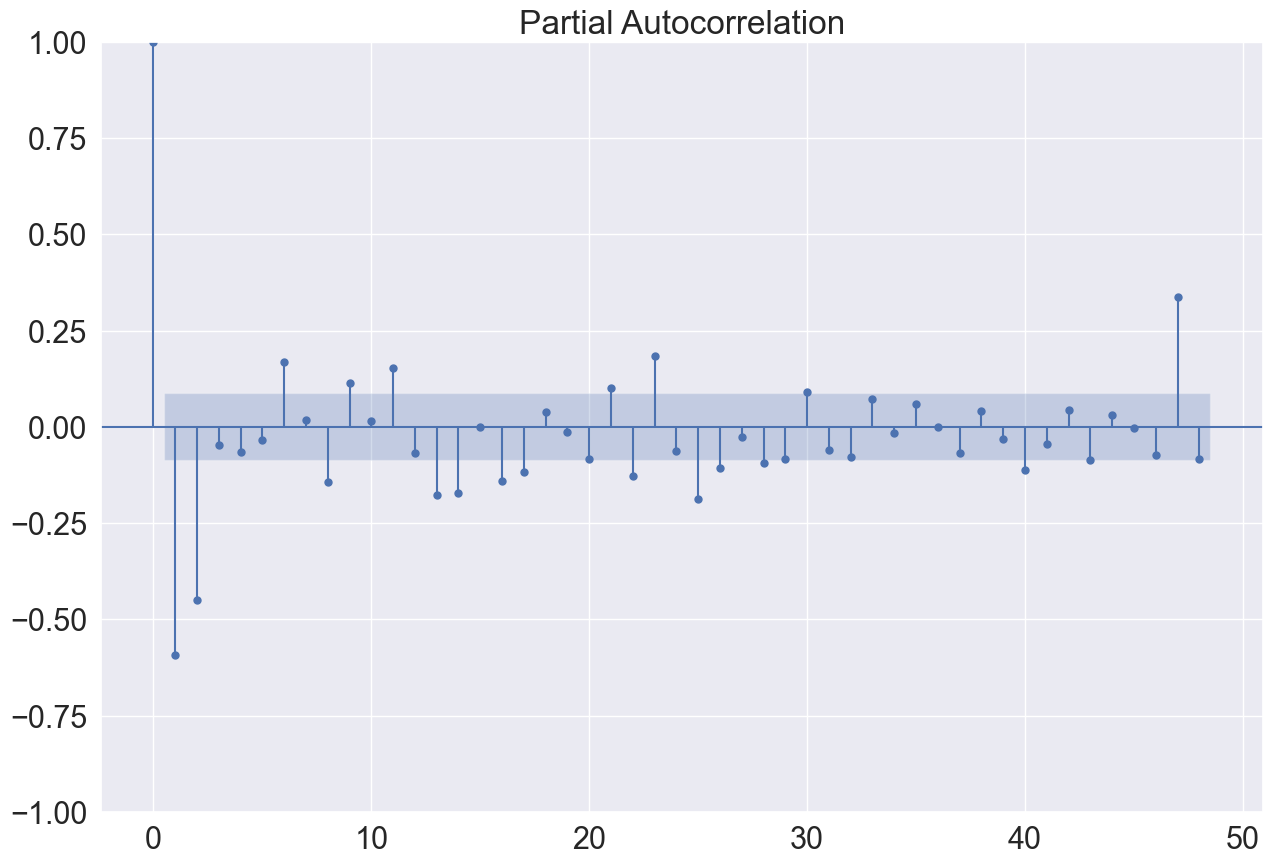

In [50]:
# Correlograma parcial PCF
plot_pacf(Ipi_log_diff_1_12_tr.dropna(inplace=False), lags = 48)
plt.show()

A pesar de la dificultad, intentemos proponer algunos órdenes en lo regular y estcional para un tentativo modelo arima. 

¿Cual sería tu primer modelo a probar según lo que observas en la desaparición de las correlaciones con los retardos?

**Respuesta**: Mi modelo sería ARIMA(p,d,q)(P,D,Q)

Parece que el modelo presenta un corte en el PAC después del segundo lag y un decrecimiento relativamente gradual en el AC, posiblemente podamos conseguir también un mejor resultado al utilizar primeras diferencias. 

En cuanto a la parte estacional parece ser un poco más dificil de observar qué proceso se puede estar llevando a cabo. Parece que tanto el PAC como el AC presentan decrecimientos graduales, el AC, más acelerado que el PAC, puede que haya tanto MA como AR y puede que diferenciar ayude.

el proceso debe de ser ARIMA(1,1,0)(1,1,1) pero lo mejor sería probar diferentes posibildades antes de presentar cualquier determinado modelo

## Pregunta 9

Ajusta ese modelo que propones y evalúa su capacidad de ajuste en test y la adecuación de residuos. 

In [51]:
# Ajuste de modelo ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo_IPI_1 = SARIMAX(IPI_log_tr, 
                order = (0, 1, 1), 
                seasonal_order =(0, 1, 1, 12)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.62510D+00    |proj g|=  8.74829D-01


 This problem is unconstrained.



At iterate    5    f= -1.63209D+00    |proj g|=  2.55886D+00

At iterate   10    f= -1.72645D+00    |proj g|=  3.63734D+00

At iterate   15    f= -1.73309D+00    |proj g|=  2.57978D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     29      1     0     0   1.070D-03  -1.733D+00
  F =  -1.7334239914704355     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [52]:
# Summary del modelo 
print(modelo_IPI_1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       IPI_Nacional   No. Observations:                  516
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 894.447
Date:                            Thu, 14 Dec 2023   AIC                          -1782.894
Time:                                    21:14:45   BIC                          -1770.232
Sample:                                01-31-1975   HQIC                         -1777.926
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7034      0.022    -31.493      0.000      -0.747      -0.660
ma.S.L12      -0.6887      0.030   

¿Son todos los efectos significativos en el modelo?

**Respuesta**: 
Todos loe efectos del modelo parecen ser significativos, pero el valor de Ljung-Box nos dice que aún hay autocorrelación

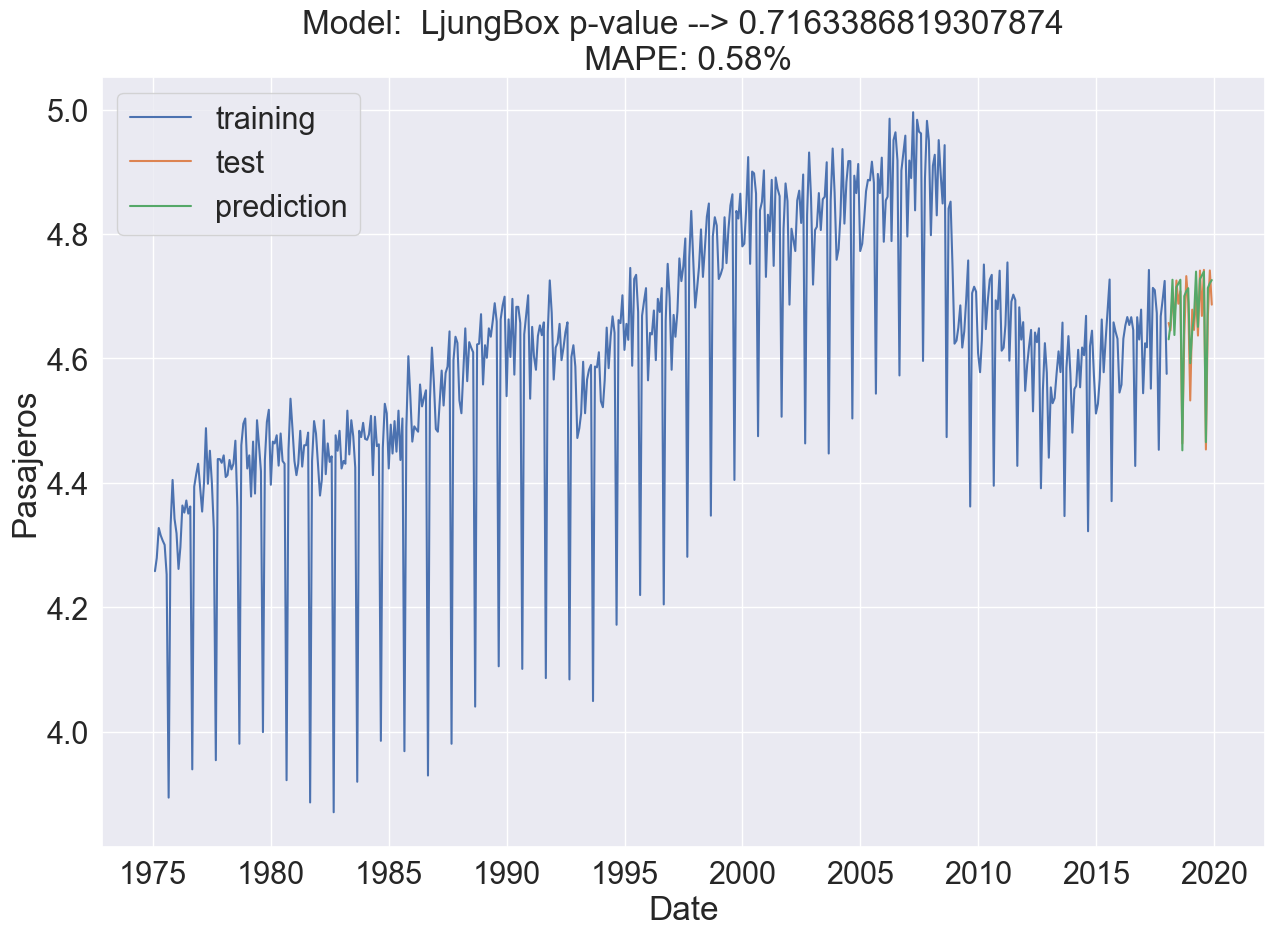

0.7163386819307874


In [53]:
# Evaluación del modelo (eval_model)
NuestrasFunciones.eval_model(modelo_IPI_1,IPI_log_tr,IPI_log_tst)

¿Es tu modelo válido para la predicción en términos de adecuación residual? En caso contrario, juega con los órdenes para obtener un modelo que satisfaga el test de residuos. ¿Es este modelo aceptable mejor que el suavizado en términos de capacidad de predicción en el conjunto de test? 

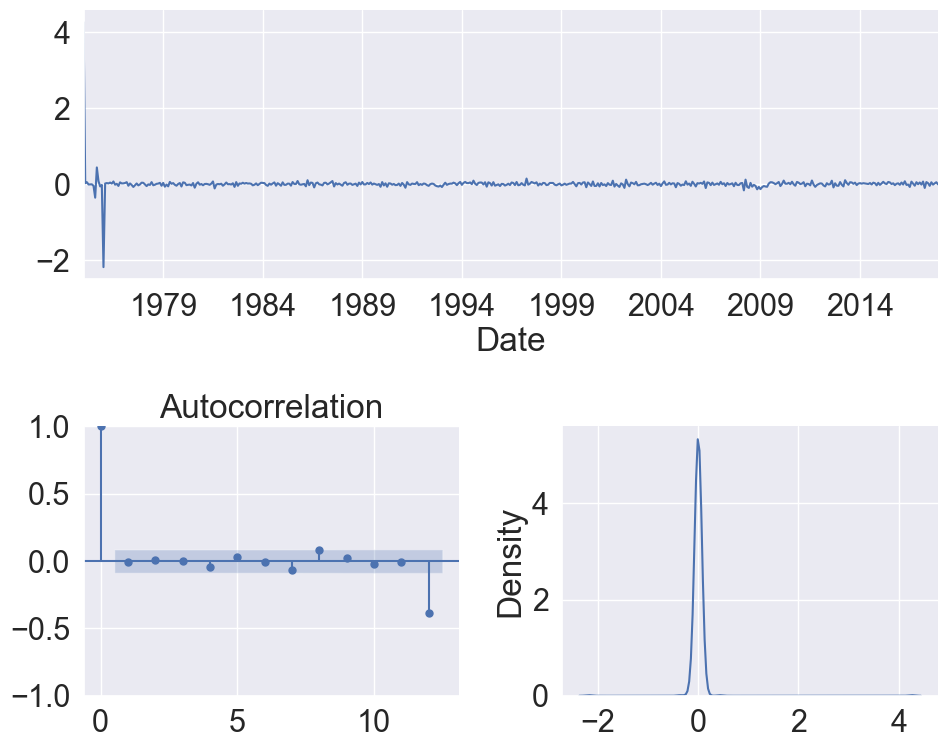

** Mean of the residuals:  0.0

** Ljung Box Test, p-value: 0.716 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


(<Axes: xlabel='Date'>,
 <Axes: title={'center': 'Autocorrelation'}>,
 <Axes: ylabel='Density'>)

In [54]:
NuestrasFunciones.residcheck(modelo_IPI_1.resid,12)

**Respuesta**: 
Mi modelo es estadísticamente válido no sólo en términos de adecuación residual, pero los residuos están centrados en cero y son estacionarios.
El modelo además tiene un MAPE de 0.58%, es un modelo mejor que el que proucen el suavizado de Holt-Winters.


Aún así quisiera jugar un poco con autoARIMA para ver si se le ocurre un mejor modelo

In [55]:
import pmdarima as pm

# Ajustamos modelo arima step-wise con métrica AIC para la serie de vuelos
arima_auto = pm.auto_arima(IPI_log_tr, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      #start_P=None, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(arima_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-226.724, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-1042.154, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-228.718, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-570.454, Time=0.11 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-1777.315, Time=1.13 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-1698.874, Time=0.42 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=-1757.600, Time=1.94 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=-1610.614, Time=2.16 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=-1227.965, Time=1.96 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=-1720.386, Time=1.06 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=-1762.115, Time=2.26 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-1508.180, Time=0.83 sec
 ARIMA(0,1,2)(1,0,1)

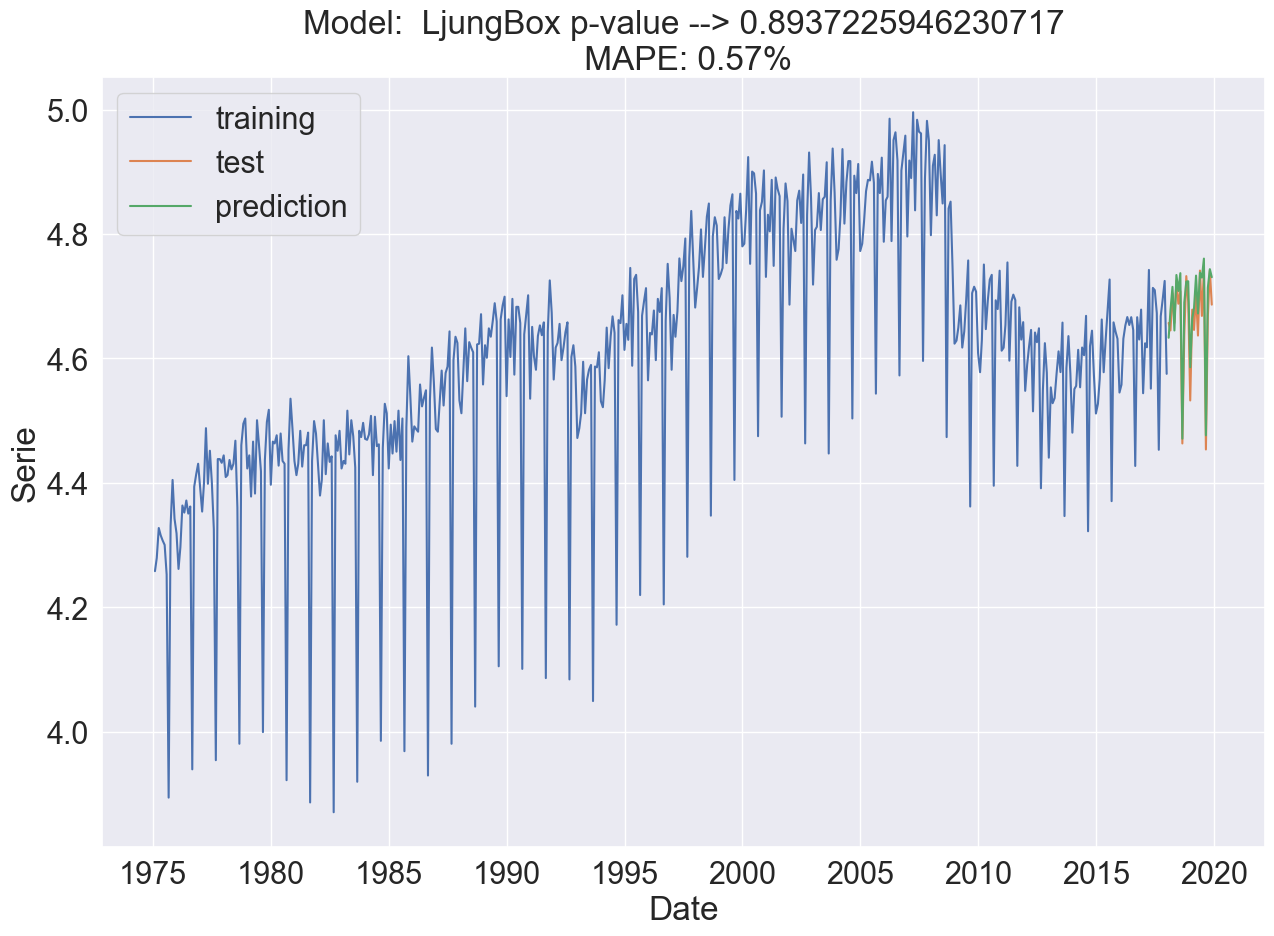

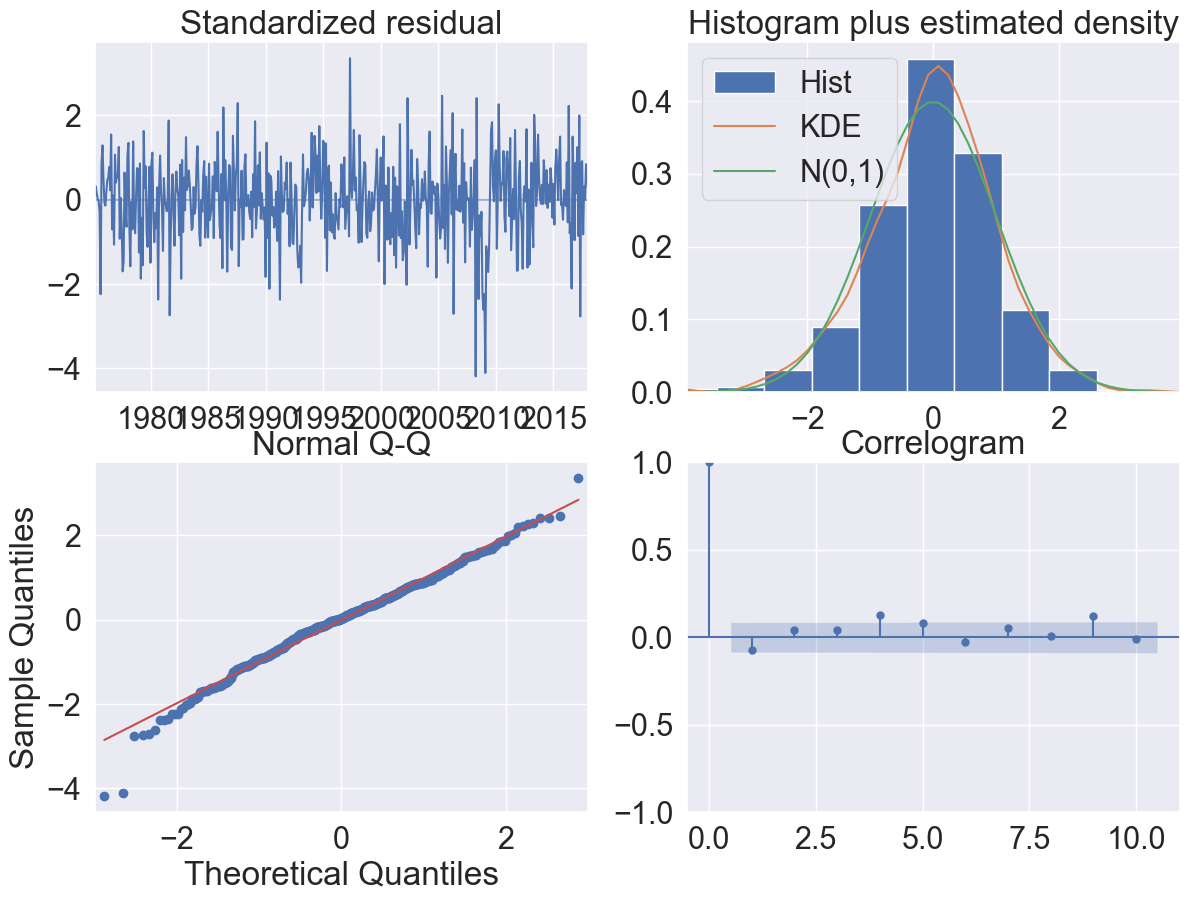

In [56]:
NuestrasFunciones.eval_model_Aarima(arima_auto,IPI_log_tr,IPI_log_tst)

AutoARIMA parece haberme ganado, tiene un MAPE inferior y un p-valor de Ljung-Box mayor, además de un AIC menor.
El mejor modelo parece ser un ARIMA(2,1,3)(1,0,1)


In [57]:
df_IPI_tr.reset_index(inplace = True)
df_IPI_tr.rename(columns = {"Date":"ds","IPI_Nacional":"y"},inplace = True)

df_IPI_tst.reset_index(inplace = True)
df_IPI_tst.rename(columns = {"Date":"ds","IPI_Nacional":"y"}, inplace = True)

print(df_IPI_tr)
print(df_IPI_tst)

            ds        y
0   1975-01-31   70.658
1   1975-02-28   72.180
2   1975-03-31   75.732
3   1975-04-30   74.844
4   1975-05-31   74.210
..         ...      ...
511 2017-08-31   85.885
512 2017-09-30  106.461
513 2017-10-31  109.454
514 2017-11-30  112.676
515 2017-12-31   97.039

[516 rows x 2 columns]
           ds        y
0  2018-01-31  105.313
1  2018-02-28  104.060
2  2018-03-31  110.466
3  2018-04-30  105.317
4  2018-05-31  112.755
5  2018-06-30  108.622
6  2018-07-31  110.835
7  2018-08-31   86.762
8  2018-09-30  103.342
9  2018-10-31  113.554
10 2018-11-30  108.957
11 2018-12-31   92.975
12 2019-01-31  107.589
13 2019-02-28  104.141
14 2019-03-31  110.276
15 2019-04-30  103.201
16 2019-05-31  114.570
17 2019-06-30  106.514
18 2019-07-31  114.698
19 2019-08-31   85.929
20 2019-09-30  106.408
21 2019-10-31  114.592
22 2019-11-30  108.464


In [58]:
#Veamos cómo le va al Prophet de META 
from prophet import Prophet 
#Uso los training test sin log


m = Prophet()
m.fit(df_IPI_tr)

future = m.make_future_dataframe(periods=23, freq='M',include_history = False)
fcst = m.predict(future)[["ds","yhat"]]


21:16:33 - cmdstanpy - INFO - Chain [1] start processing
21:16:33 - cmdstanpy - INFO - Chain [1] done processing


In [59]:
MAPE_prophet = str(round(mean_absolute_percentage_error(df_IPI_tst.y, fcst.yhat)*100))+"%"
print(MAPE_prophet)

16%


Entiendo que Prophet está hehco para calcular series temporales diarias, es más, el módulo incluye una serie de paquetes para evaluar el modelo, hacen validación cruzada, y calculan una serie de medidas de errores, pero esta parte del módulo no funciona para datos mensuales. aún así 16% me parece un error demasiado alto comparado aún con un simple modelo de holt-winters.

In [60]:
#Intentaré un modelo VARMA que utilice el PIB español para mejorar su capacidad predictiva

In [61]:
import world_bank_data as wb
df_gdp = wb.get_series('NY.GDP.MKTP.CD',country = "ES", date = "1975:2020", simplify_index = True)
df_gdp.index = pd.to_datetime(df_gdp.index)
df_gdp = pd.DataFrame(df_gdp)
#serie_GDP
#df_gdp.head(2)

In [62]:
df_gdp.reset_index(inplace = True)
df_gdp.rename(columns = {"Year":"Date","NY.GDP.MKTP.CD":"GDP"},inplace = True)
df_gdp.set_index(['Date'],inplace=True)
df_gdp.index = pd.to_datetime(df_gdp.index, format='%Y')
df_gdp = df_gdp.resample("M").ffill()
df_gdp.loc[(df_gdp.index.month != 1) & (df_gdp.index.day != 1), 'GDP'] = pd.NA
df_gdp.GDP = df_gdp.GDP.interpolate()
df_gdp  = df_gdp[:"2019-11-30 "]

In [63]:
#df_gdp.plot() No parece tener seasonality, sólo le buscaré las primeras diferencias y el logaritmo
df_gdp_log = np.log(df_gdp['GDP'])

df_gdp_log_diff_1 = df_gdp_log.diff(periods=1)
df_gdp_log_diff_1_12 = df_gdp_log_diff_1.diff(periods = 12)
#df_gdp_log_diff_1_12.plot()
NuestrasFunciones.test_stationarity(df_gdp_log_diff_1_12.dropna(inplace=False))


Results of Dickey-Fuller Test:
Test Statistic                  -4.547560
p-value                          0.000161
#Lags Used                      12.000000
Number of Observations Used    513.000000
Critical Value (1%)             -3.443162
Critical Value (5%)             -2.867190
Critical Value (10%)            -2.569780
dtype: float64


In [64]:

df_gdp_log_diff_1_12_tr = df_gdp_log_diff_1_12[:'2017-12-31']
df_gdp_log_diff_1_12_tst = df_gdp_log_diff_1_12['2018-01-31':]

In [65]:
def eval_Varima(model,tr,tst,exog,name='Model',lags=12):
    lb = np.mean(sm.stats.acorr_ljungbox(model.resid, lags=lags, return_df=True).lb_pvalue)
    pred = model.forecast(steps=len(tst), exog = exog)
    fig1, ax = plt.subplots()
    ax.plot(tr, label='training')
    ax.plot(tst, label='test')
    ax.plot(pred, label='prediction')
    plt.legend(loc='upper left')
    tit = name + ":  LjungBox p-value --> " + str(lb) + "\n MAPE: " + str(round(mean_absolute_percentage_error(tst, pred)*100,2)) + "%"
    plt.title(tit)
    plt.ylabel('Pasajeros')
    plt.xlabel('Date')
    plt.show()
    print(lb)

In [66]:
modelo_VARIMA = SARIMAX(endog = Ipi_log_diff_1_12_tr.dropna(inplace=False), 
                        exog = df_gdp_log_diff_1_12_tr.dropna(inplace=False),
                order = (0, 0, 1), 
                seasonal_order =(0, 0, 1, 12)).fit()
modelo_VARIMA.summary()
pred = modelo_VARIMA.forecast(steps=len(IPI_log_tst), exog = df_gdp_log_diff_1_12_tst)
print("Con un Mape de: "+str(round(mean_absolute_percentage_error(IPI_log_tst, pred)*100,2)))
#eval_Varima(modelo_VARIMA,Ipi_log_diff_1_12_tr,IPI_log_tst,exog = df_gdp_log_diff_1_12_tst,name='Model',lags=12)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.65963D+00    |proj g|=  1.70648D-01


 This problem is unconstrained.



At iterate    5    f= -1.67820D+00    |proj g|=  1.36749D-01

At iterate   10    f= -1.71994D+00    |proj g|=  1.08947D+01

At iterate   15    f= -1.78795D+00    |proj g|=  2.11190D-01

At iterate   20    f= -1.78834D+00    |proj g|=  3.40122D-01

At iterate   25    f= -1.78857D+00    |proj g|=  1.60508D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     33      1     0     0   1.605D-03  -1.789D+00
  F =  -1.7885736620598114     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Con un Mape de: 100.03


## Pregunta 10

Indica el código necesario para leer el archivo **"clientes_cluster.csv"** y mostrar sus primeros registros. 

In [67]:
# Lectura clientes_cluster
df_clientes = pd.read_csv("clientes_cluster.csv")
df_clientes.rename(columns = {"Spending Score (1-100)":"Spending_score"},inplace = True)
#[scores == int(scores) for scores in df_clientes.Spending_score.dropna()]
#[ages == int(ages) for ages in df_clientes.Age.dropna()]

## Pregunta 11

Evalúa la incidencia de valores perdidos por variable e imputa el archivo mediante el método multivariante basado en el algoritmo KNN, generando un nuevo archivo completo **"clientes_imputed"** del que se mostrará la información para comprobar que efectivamente todos los registros contienen valores válidos.

In [68]:
#Incidencia de missings por variable
print(df_clientes.info())
print("-----")
print(df_clientes.apply(lambda x: x.isna().sum()))
print("-----")
print(df_clientes.Gender.value_counts())
print(df_clientes.Spending_score.value_counts().sort_index()[0:5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          200 non-null    int64  
 1   Gender              185 non-null    object 
 2   Age                 187 non-null    float64
 3   Annual Income (k$)  191 non-null    float64
 4   Spending_score      182 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB
None
-----
CustomerID             0
Gender                15
Age                   13
Annual Income (k$)     9
Spending_score        18
dtype: int64
-----
Gender
Female    102
Male       83
Name: count, dtype: int64
Spending_score
1.0    1
3.0    1
4.0    2
5.0    4
Name: count, dtype: int64


In [69]:
#df_clientes["Gender"] = df_clientes.loc[df_clientes["Gender"] == "Male","Gender"] = 1
df_clientes.loc[df_clientes["Gender"] == "Male", "Gender"] = 1
df_clientes.loc[df_clientes["Gender"] == "Female","Gender"] = 0
df_clientes.Gender = df_clientes.Gender.astype('category')

In [70]:
"""
df_clientes['Age'].fillna(0, inplace=True)
df_clientes.Age = df_clientes.Age.astype('int')
df_clientes['Age'] = df_clientes['Age'].replace(0, np.nan)

df_clientes['Spending_score'].fillna(0, inplace=True)
df_clientes.Spending_score = df_clientes.Spending_score.astype('int')
df_clientes['Spending_score'] = df_clientes['Spending_score'].replace(0, np.nan)
df_clientes.info()
"""

"\ndf_clientes['Age'].fillna(0, inplace=True)\ndf_clientes.Age = df_clientes.Age.astype('int')\ndf_clientes['Age'] = df_clientes['Age'].replace(0, np.nan)\n\ndf_clientes['Spending_score'].fillna(0, inplace=True)\ndf_clientes.Spending_score = df_clientes.Spending_score.astype('int')\ndf_clientes['Spending_score'] = df_clientes['Spending_score'].replace(0, np.nan)\ndf_clientes.info()\n"

**Comentario**:

In [71]:
# Imputación por KNN
import sklearn.impute as skl_imp
imputer_knn = skl_imp.KNNImputer(n_neighbors=3)
clientes_imputed = pd.DataFrame(imputer_knn.fit_transform(df_clientes),columns=df_clientes.columns)

In [72]:
#print(clientes_imputed.head(40))
#clientes_imputed.Gender = df_clientes_imputado.Gender.astype('category')
clientes_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          200 non-null    float64
 1   Gender              200 non-null    float64
 2   Age                 200 non-null    float64
 3   Annual Income (k$)  200 non-null    float64
 4   Spending_score      200 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


Recodifica *Gender* como una variable dummy (cualquier opción de código es bienvenida) en formato numérico y elimina el ID de cliente de cara al análisis.

In [73]:
# Recodificación de Gender como dummy
clientes_imputed.drop(["CustomerID"],axis = 1, inplace = True)
clientes_imputed.head()

Gender   Age  Annual Income (k$)  Spending_score
0     1.0  19.0           15.000000       39.000000
1     1.0  21.0           15.000000       40.333333
2     0.0  20.0           16.000000        6.000000
3     0.0  23.0           16.000000       58.666667
4     0.0  31.0           15.333333       40.000000

## Pregunta 12

Explora los métodos de clustering jerárquico para formar grupos de clientes similares en cuanto a su comportamiento en estas 4 variables disponibles y presenta sus dendogramas. Si lo consideras necesario, escala los datos previamente.

In [74]:
# Clustering jerárquico bucle de dendogramas
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from time import time

clientes_imputed_scale = scale(clientes_imputed)

Escalo los datos porque los clusters se forman a partir de distancias, si no escalaba se le hubiese dado demasiada importancia a Annual income y se hubiese obviado Age

ward


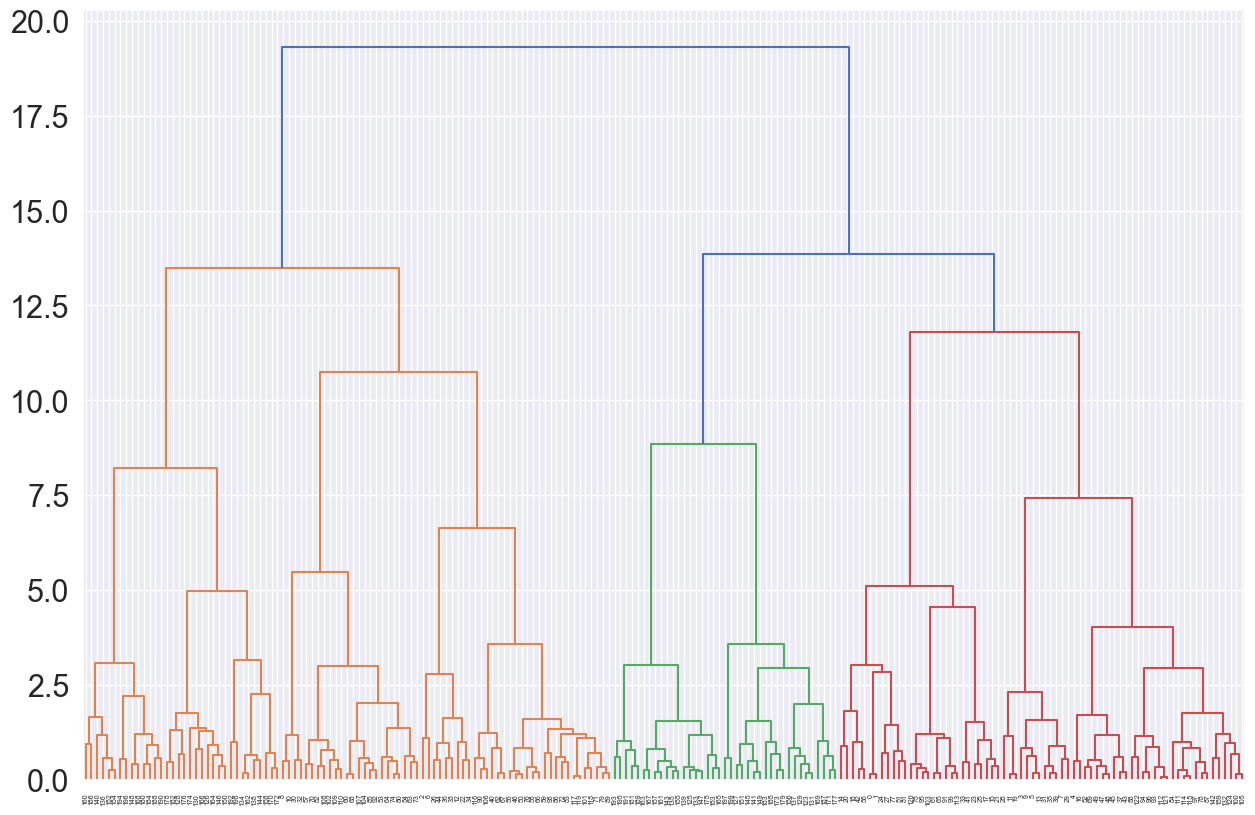

average


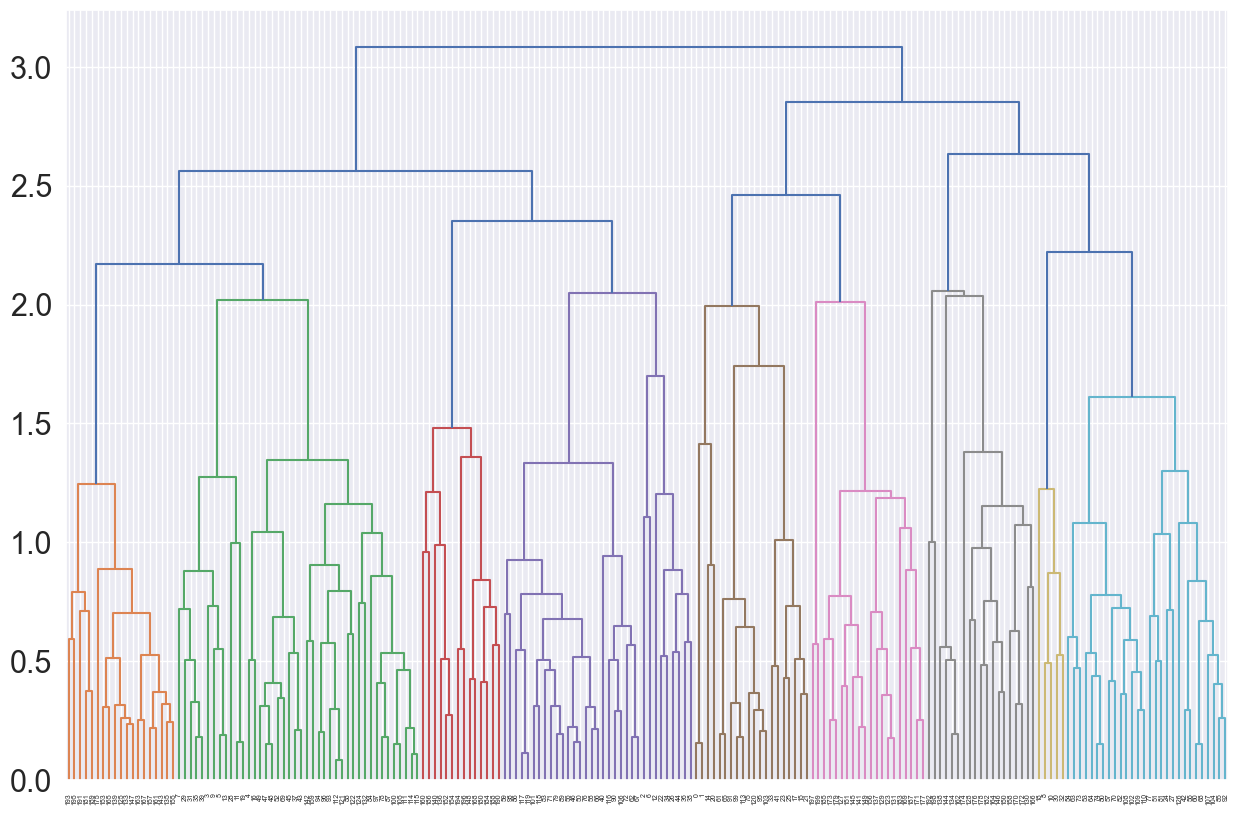

complete


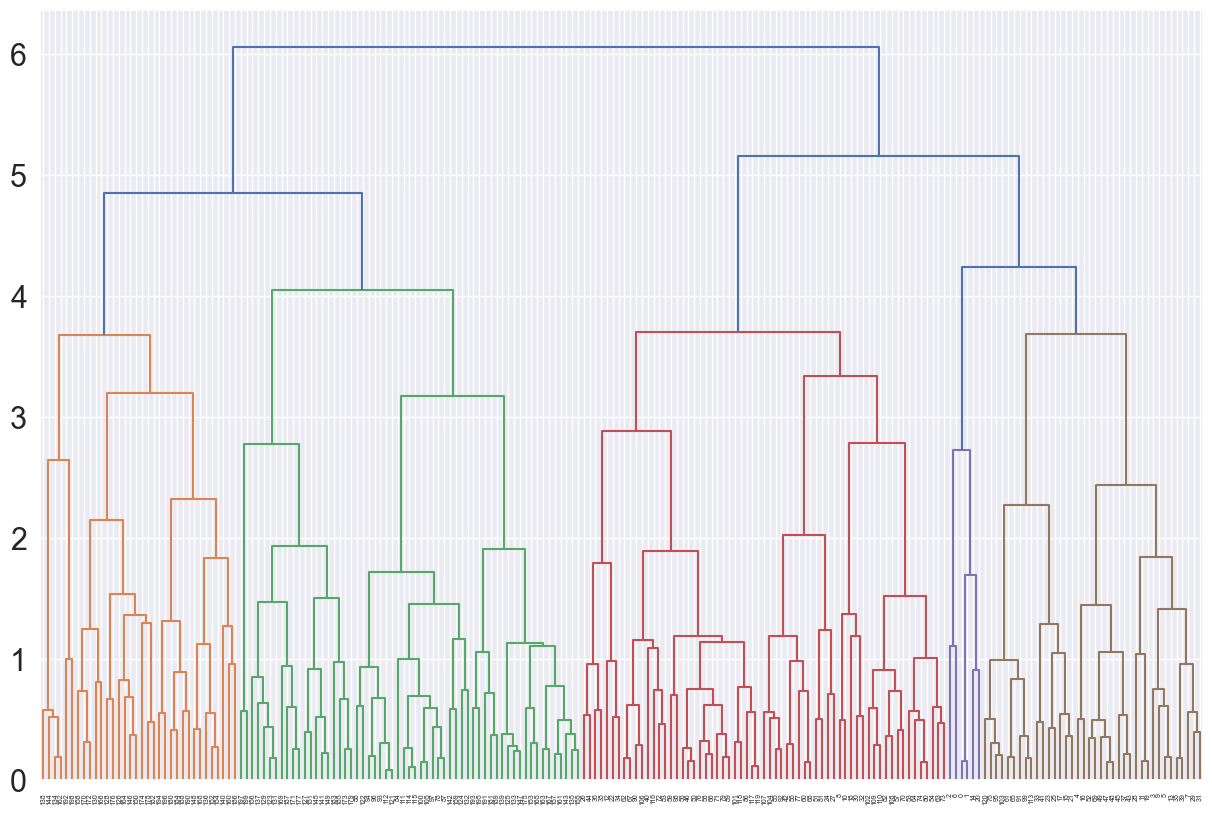

single


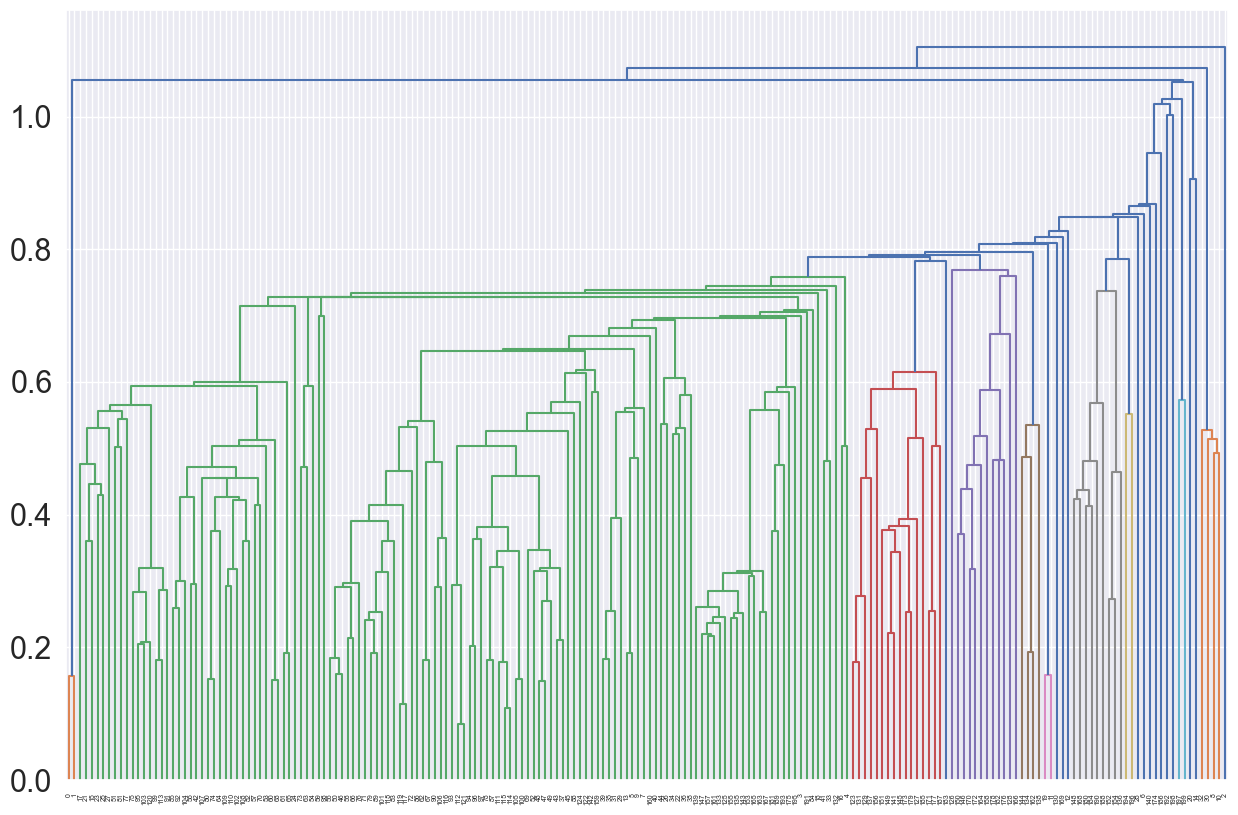

In [75]:
for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=None,
                            distance_threshold = 0)
    t0 = time()
    clustering.fit(clientes_imputed_scale)
    print(linkage)
    
    plt.clf()
    NuestrasFunciones.plot_dendogram(clustering)
    #plot_clustering(X_scaled, clustering.labels_, "%s linkage" % linkage)
plt.show()

El criterio de linkage de Ward parece ser el que nos da clsuters más diferenciados los unos de los otros,con tamaños similares y líneas largas.
Pero el escoger cuántos clusters debo elegir no me queda muy claro viendo sólo el gráfico, arbitrariamente diría que son 4 clusters, pero lo revisaré

¿Cuál es el método de linkage más adecuado a la vista de los dendogramas? ¿Cuantos grupos de clientes formarías en base a las alturas del dendograma del linkage escogido?

**Respuesta**:
El criterio de linkage de Ward parece ser el que nos da clsuters más diferenciados los unos de los otros,con tamaños similares y líneas largas.
Para escoger cuántos clusters hay que mirar la longitud de las líneas en el dendograma, si cortamos en 4 clusters estamos cortando líneas muy pequeñas, si seguimos bajando podemos ver que hay 10 clusters que están bien diferenciados y que su corte elimina líneas largas.

## Pregunta 13

Explora el clustering K-means con distinto número de grupos y decide cuantos el número de clusters óptimo para la solución según este método. Comenta las métricas de evaluación.

In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

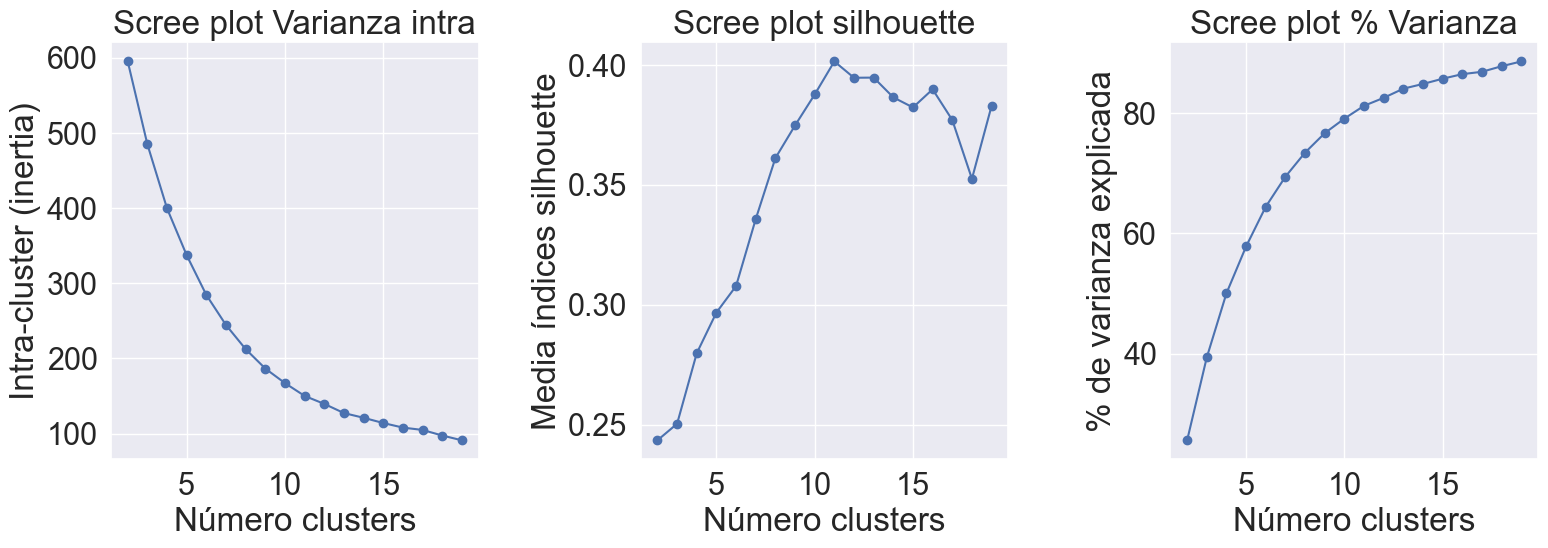

In [77]:
# Clustering k-means evaluación número clusters
NuestrasFunciones.scree_plot_kmeans(clientes_imputed,20)

In [78]:
siluetas = []
indices_silu = []

calinski = []
indices_cali =[] 
for i in range(2,20):
    
    modelo_kmeans = KMeans(
                          n_clusters   = i, 
                          n_init       = 5, 
                          random_state = 123
                      )
    modelo_kmeans.fit(clientes_imputed_scale)
    cluster_labels = modelo_kmeans.labels_
    silueta = silhouette_score(clientes_imputed_scale, modelo_kmeans.labels_)
    siluetas.append(silueta)
    indices_silu.append(i)

    calinski_score = calinski_harabasz_score(clientes_imputed_scale, modelo_kmeans.labels_)
    calinski.append(calinski_score)
    indices_cali.append(i)
    
    print(f"interación = {i} con valor de silueta de {round(silueta,3)} y calinski de {calinski_score}")
    
print(f"valor maximo de silueta = {max(siluetas)}")
indice_max_silu = siluetas.index(max(siluetas))
print(f"se consigue el valor máximo con {indices_silu[indice_max_silu]} clusters")

print(f"valor maximo de calinski-harabaz = {max(calinski)}")
indice_max_cal = calinski.index(max(calinski))
print(f"se consigue el valor máximo con {indices_cali[indice_max_cal]} clusters")

interación = 2 con valor de silueta de 0.243 y calinski de 68.10503338341603
interación = 3 con valor de silueta de 0.255 y calinski de 63.482868881466025
interación = 4 con valor de silueta de 0.28 y calinski de 65.4413303982227
interación = 5 con valor de silueta de 0.298 y calinski de 66.84533782320406
interación = 6 con valor de silueta de 0.306 y calinski de 70.31887004906808
interación = 7 con valor de silueta de 0.325 y calinski de 69.46166727678539
interación = 8 con valor de silueta de 0.359 y calinski de 75.47248106972843
interación = 9 con valor de silueta de 0.368 y calinski de 75.14047543765122
interación = 10 con valor de silueta de 0.389 y calinski de 79.71628272890672
interación = 11 con valor de silueta de 0.401 y calinski de 81.76572165415752
interación = 12 con valor de silueta de 0.389 y calinski de 80.49664560636646
interación = 13 con valor de silueta de 0.397 y calinski de 82.27875832173201
interación = 14 con valor de silueta de 0.4 y calinski de 77.159979417431

**Respuesta**: 
-La métrica de la silueta, que nos indica la media de similitud de cada punto con su cluster nos dice que el mejor número de clusters es 11
-La métrica de calinski-harabaz que nos indica tanto diferenciación de clusters como similitud de los puntos dentro del cluster nos indica que el número perfecto de clusters es 13
-El método del codo en el scree plot parece que nos indica que 9 clusters es lo ideal.

Yo me decanto por un total de 10 clusters, respetando las métricas de calinski-harabaz y de la silueta, pues ambas medidas incrementan considerablemente de 9 a 10 nodos, pero cuidando no sobre-ajusta mi modelo.

Ajusta el clustering K-means con el núemero de grupos seleccionado y genera una nueva variable en el conjunto de datos imputado llamada *'Cluster'* que recoja el número de grupo asignado a cada registro. El tipo de la variable debe ser entero (int).  

In [79]:
# Ajuste de k-means
modelo_kmeans = KMeans(
                          n_clusters   = 10, 
                          n_init       = 5, 
                          random_state = 123
                      )
modelo_kmeans.fit(clientes_imputed_scale)

clientes_imputed["Cluster"] = modelo_kmeans.labels_.astype(int)
clientes_imputed_scale = pd.DataFrame(scale(clientes_imputed))
clientes_imputed_scale.columns = clientes_imputed.columns
#clientes_imputed_scale.columns = clientes_imputed.columns

Extrae los centroides de los grupos y comenta las principales características de cada grupo formado. 

In [80]:
# Centroides
modelo_kmeans.cluster_centers_

array([[ 1.03189987,  0.07499098,  0.95113503, -1.40616941],
       [-0.88004839, -0.79206161, -0.03555229, -0.14709443],
       [-0.88004839,  1.11849294, -0.23194848, -0.09532787],
       [ 1.06403146,  1.28993953, -0.53273606, -0.3379664 ],
       [-0.93526711, -0.42843145,  0.96616467,  1.24911419],
       [ 1.06641158, -0.41392081,  1.01664283,  1.1728196 ],
       [-0.93526711,  0.12244517, -1.31758553, -1.1597688 ],
       [ 1.1054248 , -1.00022072, -0.79114005,  0.3618932 ],
       [-0.93526711,  0.31421561,  1.26438852, -1.1747901 ],
       [-0.93526711, -0.87179058, -1.28821398,  1.10010625]])

**Comentarios**: 

## Pregunta 14

De cara a la proyección de los grupos formados en el espacio de características y dado que estamos en R4. Nos planteamos reducir la dimensionalidad a 2 para poder interpretar con mayor claridad mediante un bonito biplot. 

Para llevar a cabo esta tarea, necesitaremos ajustar un PCA con 2 dimensiones a los datos de entrada al clustering que hemos generado, es decir, tal vez utilizamos el conjunto de datos escalado si lo consideramos necesario. Mostraremos las cargas de las variables en las componentes y haremos una pequeña interpretación inicial de las 2 componentes.


In [81]:
from factor_analyzer.factor_analyzer import calculate_kmo
print("Antes de realizar un PCA veamos la métrica del kmo, el cual nos indica que tan adecuados son nuestros datos para realizar un PCA")
print("Recordemos que el PCA no se puede correr con la columna de clusters, nos puede traer problemas amontonar dos técnicas de agrupación")
clientes_imputed.drop("Cluster", axis = 1, inplace = True)
print(clientes_imputed.columns)
clientes_imputed_scale.drop("Cluster", axis = 1, inplace = True)
print("Parece que la métrica de evaluación calculate_kmo normaliza los datos automáticamente ")
print(calculate_kmo(clientes_imputed))
print(calculate_kmo(clientes_imputed_scale))
print()
print("Podemos mejorar la métrica de KMO si soltamos la columna que menos es capaz de explicar la variación del resto de las variables")
print("Pero no por mucho, yo prefiero no desechar la información que nos proporciona")
print(calculate_kmo(clientes_imputed.drop(["Annual Income (k$)"], axis = 1)))
#El KMO del dataset es aceptable, pero no muy bueno.
#Podemos hacer un PCA, pero no se espera que el dataset se preste a ser reducido a 2 dimensiones explicando una buena parte de la varianza.
#Tampoco se puede descartar uno de los componentes para subir el KMO medio, el peor componente no es mucho peor que la media.

Antes de realizar un PCA veamos la métrica del kmo, el cual nos indica que tan adecuados son nuestros datos para realizar un PCA
Recordemos que el PCA no se puede correr con la columna de clusters, nos puede traer problemas amontonar dos técnicas de agrupación
Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending_score'], dtype='object')
Parece que la métrica de evaluación calculate_kmo normaliza los datos automáticamente 
(array([0.60088489, 0.50916504, 0.49121225, 0.5091671 ]), 0.5127661350818642)
(array([0.60088489, 0.50916504, 0.49121225, 0.5091671 ]), 0.512766135081864)

Podemos mejorar la métrica de KMO si soltamos la columna que menos es capaz de explicar la variación del resto de las variables
Pero no por mucho, yo prefiero no desechar la información que nos proporciona
(array([0.65439732, 0.5090646 , 0.50903542]), 0.5133845416382312)


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


Gender       Age  Annual Income (k$)  Spending_score
PC1  0.256895  0.682897           -0.003915       -0.683843
PC2  0.605171 -0.115081            0.780301        0.107952

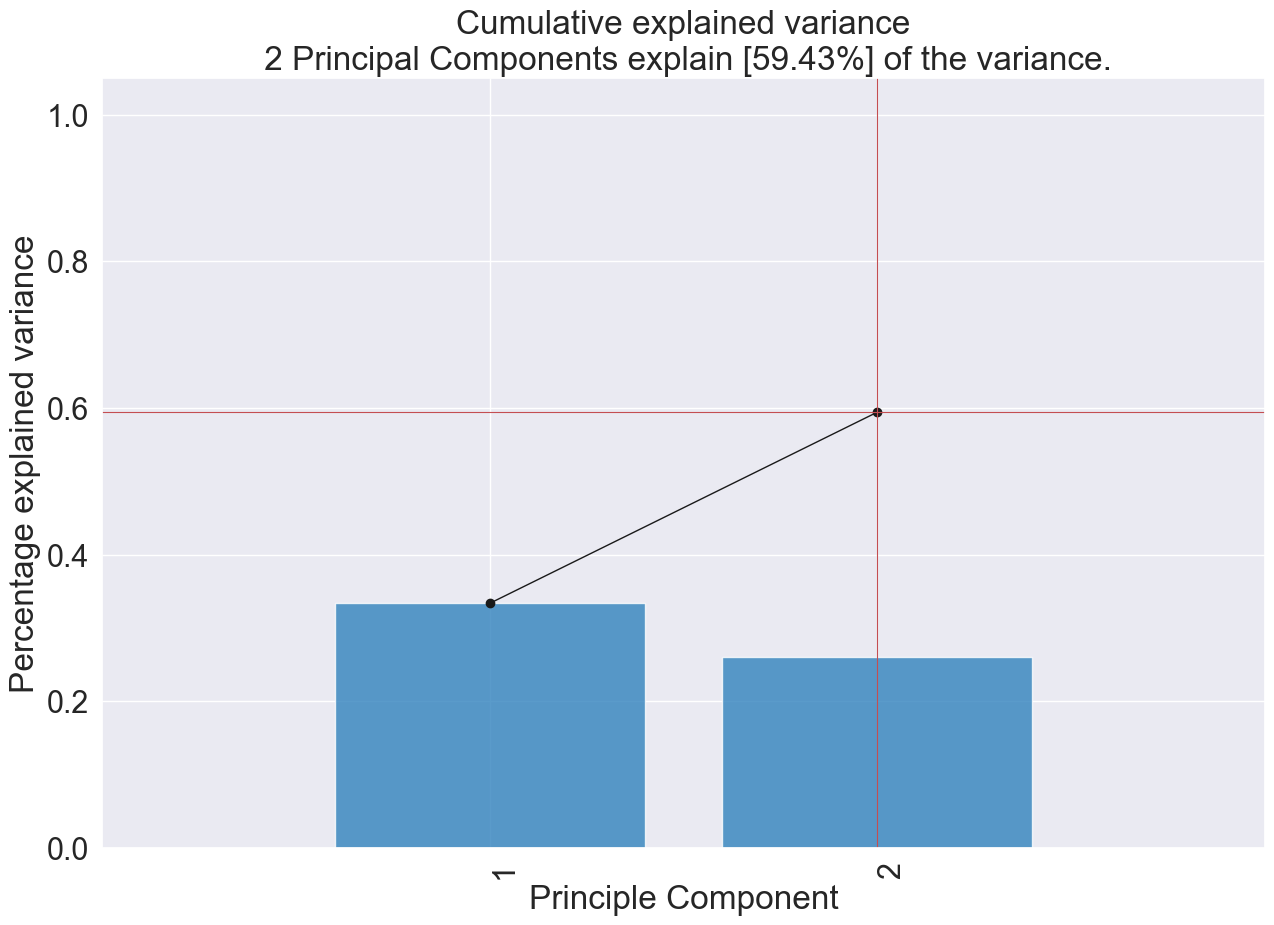

In [82]:
# Ajuste PCA 2 dimensiones
#Usaré los datos sin normalizar porque el paquete pca lo puede hacer por mí.
#De esta manera si necesito alguna métrica de los datos sin normalizar la tendré a libre disposición.
#El modelo de PCA lo he de crear sin la columna clusters
from pca import pca
pca_model  = pca(normalize = True,n_components = 2)
pca_results = pca_model.fit_transform(clientes_imputed)

pca_model.plot()
# Análisis de cargas
pca_model.results['loadings']

**Interpretación inicial**:
Nuesto pca sólo logra explicar el 59.43% de la variabilidad del modelo, no es muy útil para explicar nuestro dataset.

En cuánto a las cargas, recordando que las cargas representan el coeficiente de la variable en la combinación de la componente. Podemos observar que la componente principal 1 tiene una carga positiva de magnitud 0.6 para la variable age, esto significa que dentro de la combinación lineal que forma a PC1, age tiene una influencia moderadamente fuerte y positiva. Con spending score ocurre lo contrario, pues tiene una carga negativa de aproximadamente 0.7, la variable tiene una influencia algo fuerte sobre PC1 en sentido negativo. Annual income casi no satura la primera componente, tiene muy poca influencia sobre ella. La variable gender al ser dicotómica se comporta de manera diferente dentro del análisis pca, pero podemos igualmente decir que su influencia positiva sobre PCA1 es leve.

En cuanto a la segunda componente, las variable que claramente más se saturas en ella son Annual Income y Gender, ambas en sentido positivo. Esto significa que la combinación lineal que conforma el PC2 tiene coeficientes altos en Annual Income y Gender, es decir que la influencia positiva de ambas en alta sobre la componente

Ahora generamos y mostramos el biplot para interpretar con mayor seguridad las componentes. 

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [59.43%] of the variance'}, xlabel='PC1 (33.3% expl.var)', ylabel='PC2 (26.0% expl.var)'>)

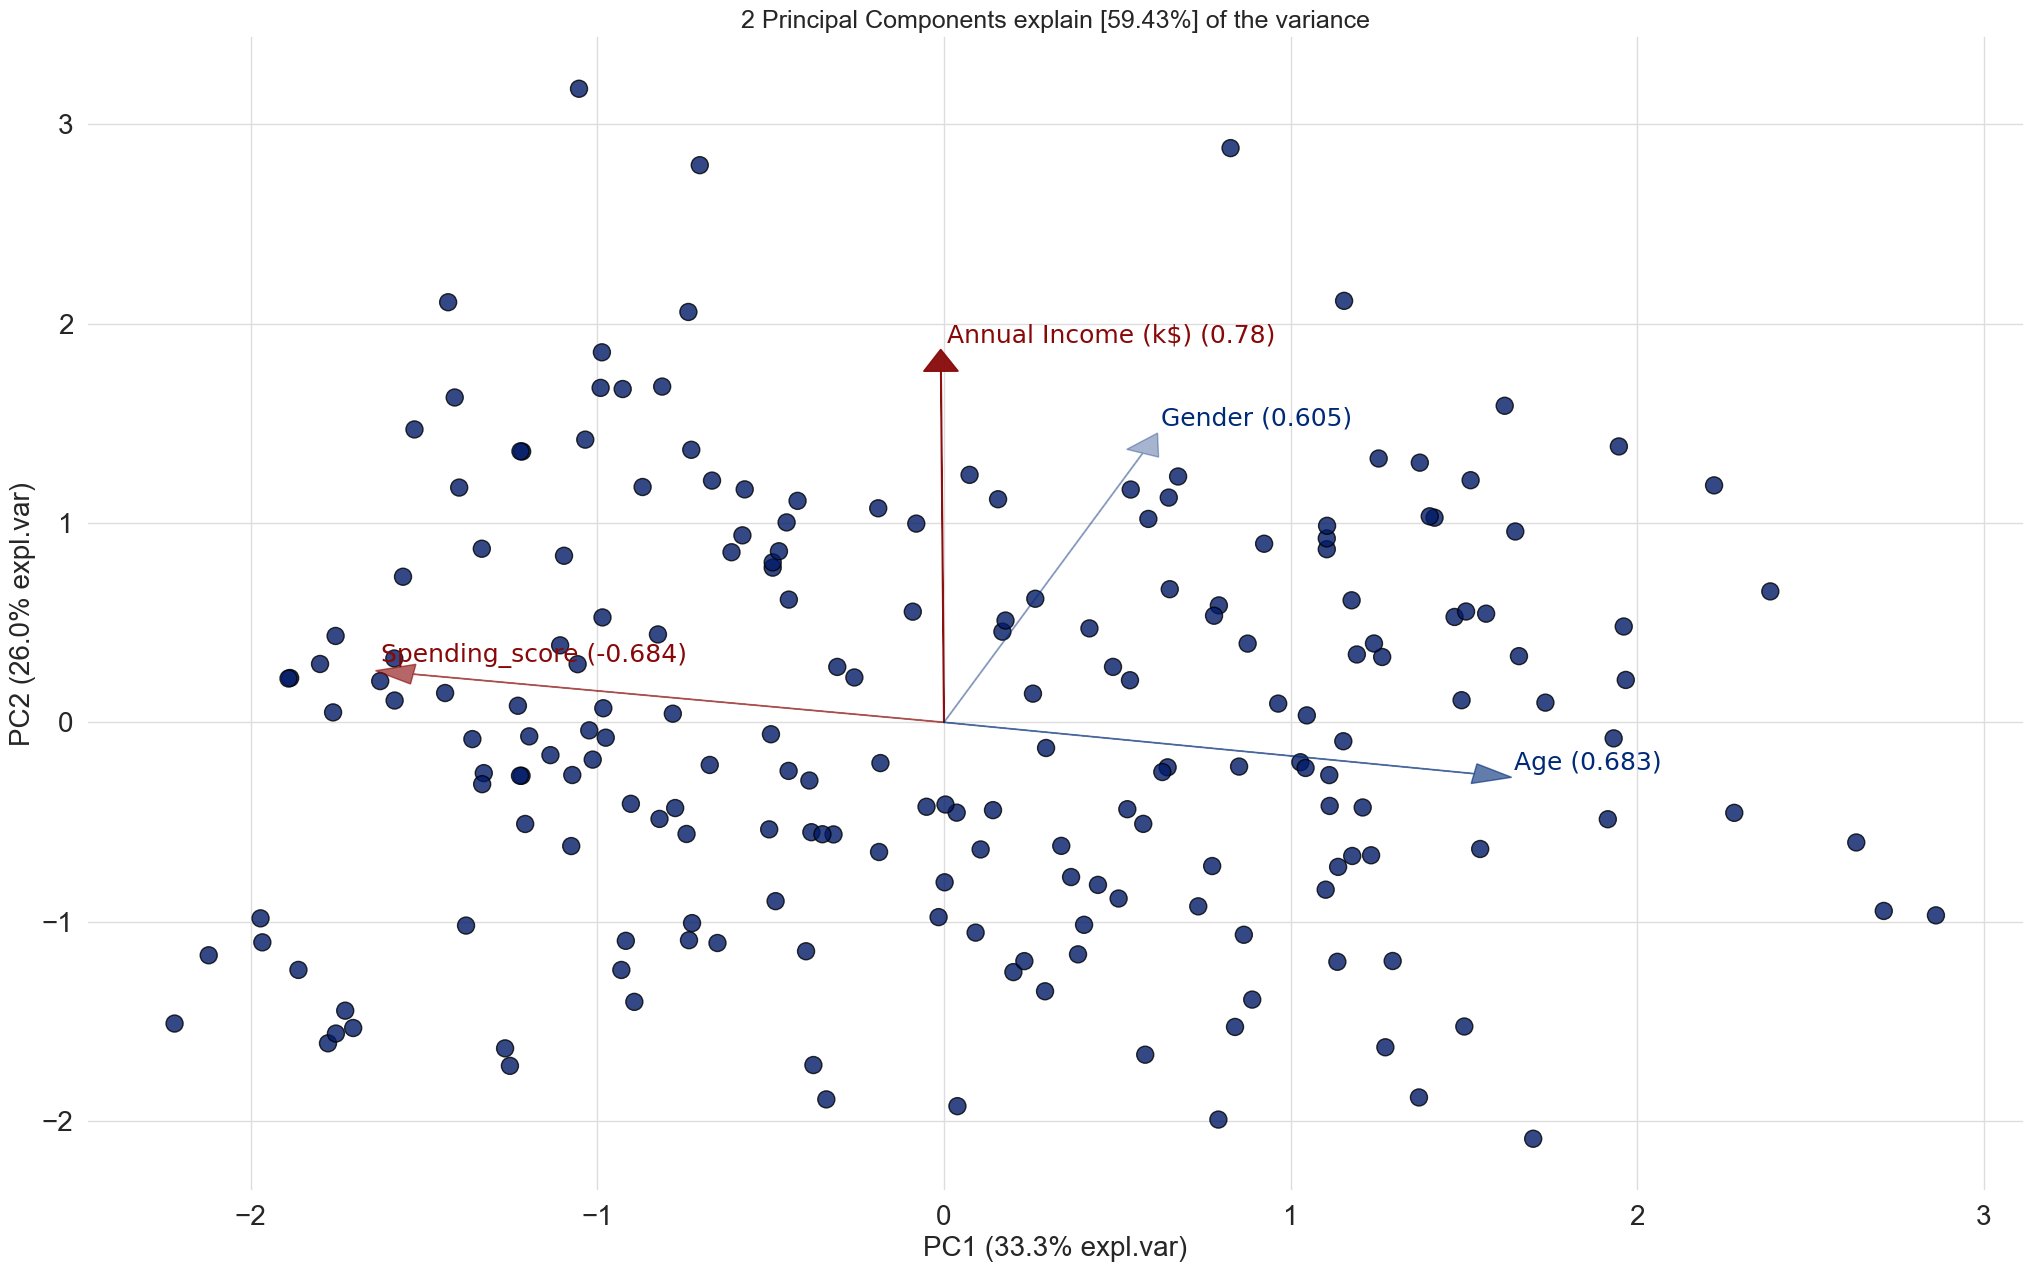

In [83]:
# Biplot
pca_model.biplot()

**Interpretación gráfica**:
La interpretación gráfica, en este caso, no se diferencia mucho de la interpretación de las cargas. La PC1 se nota que es una combinación lineal de age y gender positivamente y spending score negativamente, graficamente se nota de manera muy clara la baja influencia que tiene Annual Income sobre la PC1, es casi casi completamente perpendicular

Mientras que PC2 se ve influenciada de manera moderadamente fuerte por annual income y Gender de manera positiva.


Otra cosa que se puede interpolar del gráfico es que un análisis factorial, tipo PROMAX sería capaz de rotar los ejes del biplot, para lograr que cada variable se enfoque más en cada componente (o en este caso, factor). Con la consequencia, por supuesto, de perder la ortogonalidad entre los distintos componentes(factores). En este caso, sin embargo, no se ve muy necesario. Aún así lo intentaré.

Efectivamente el análisis factorial nos acomoda la dirección de las flechas de las variables de PC1 para que se alineen con la eje horizontal.
pero se le añade influencia a anual income en cuanto al primer factor, prefiero la interpretación en la que annual income sólo afecta a uno de los dos factores.


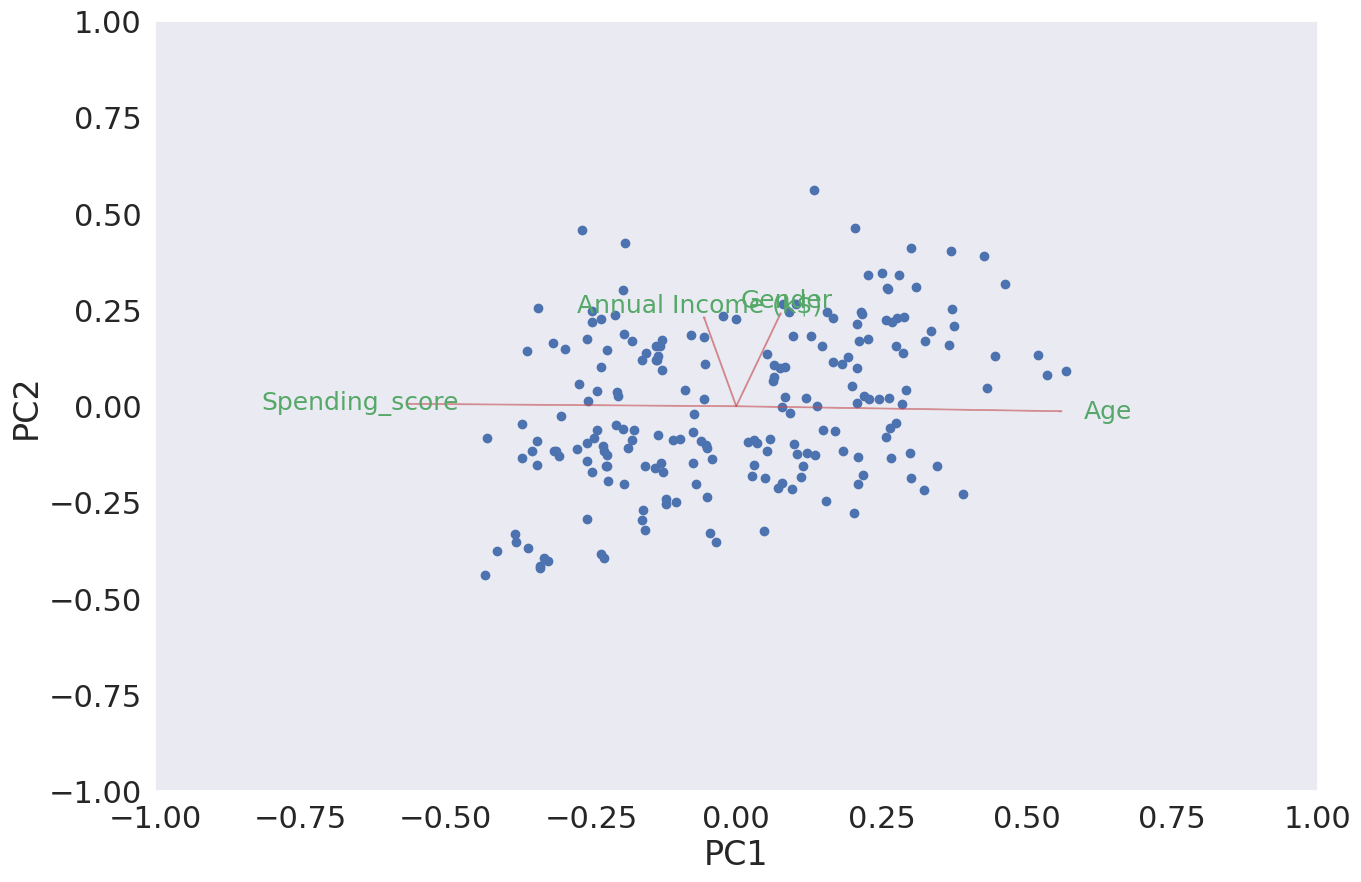

In [84]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(rotation = "promax", method='minres',n_factors=2) 
#Factor analyzer ya no nos implementa funcionalidad de escalado, le pasamos los datos escalados con sickit-learn
fa.fit(clientes_imputed_scale)
fa_loadings = pd.DataFrame(fa.loadings_,index=clientes_imputed.columns)
fa_scores = pd.DataFrame(fa.transform(clientes_imputed_scale),index=clientes_imputed.index)
NuestrasFunciones.biplot(np.array(fa_scores),np.array(fa_loadings),clientes_imputed.columns)
print("Efectivamente el análisis factorial nos acomoda la dirección de las flechas de las variables de PC1 para que se alineen con la eje horizontal.")
print("pero se le añade influencia a anual income en cuanto al primer factor, prefiero la interpretación en la que annual income sólo afecta a uno de los dos factores.")

In [85]:
pca_model.results['PC']
print(pca_model.results['PC'].columns)

Index(['PC1', 'PC2'], dtype='object')


Ahora que sabemos lo que represanta cada componente en el espacio original de las variables, necesitamos un conjunto de datos que contenga las columnas *PC1*,*PC2* y *Cluster* para realizar la representación de los clientes por grupos propuestos e interpretar las características de los grupos en el espacio de las componentes. 

<Axes: xlabel='PC1', ylabel='PC2'>

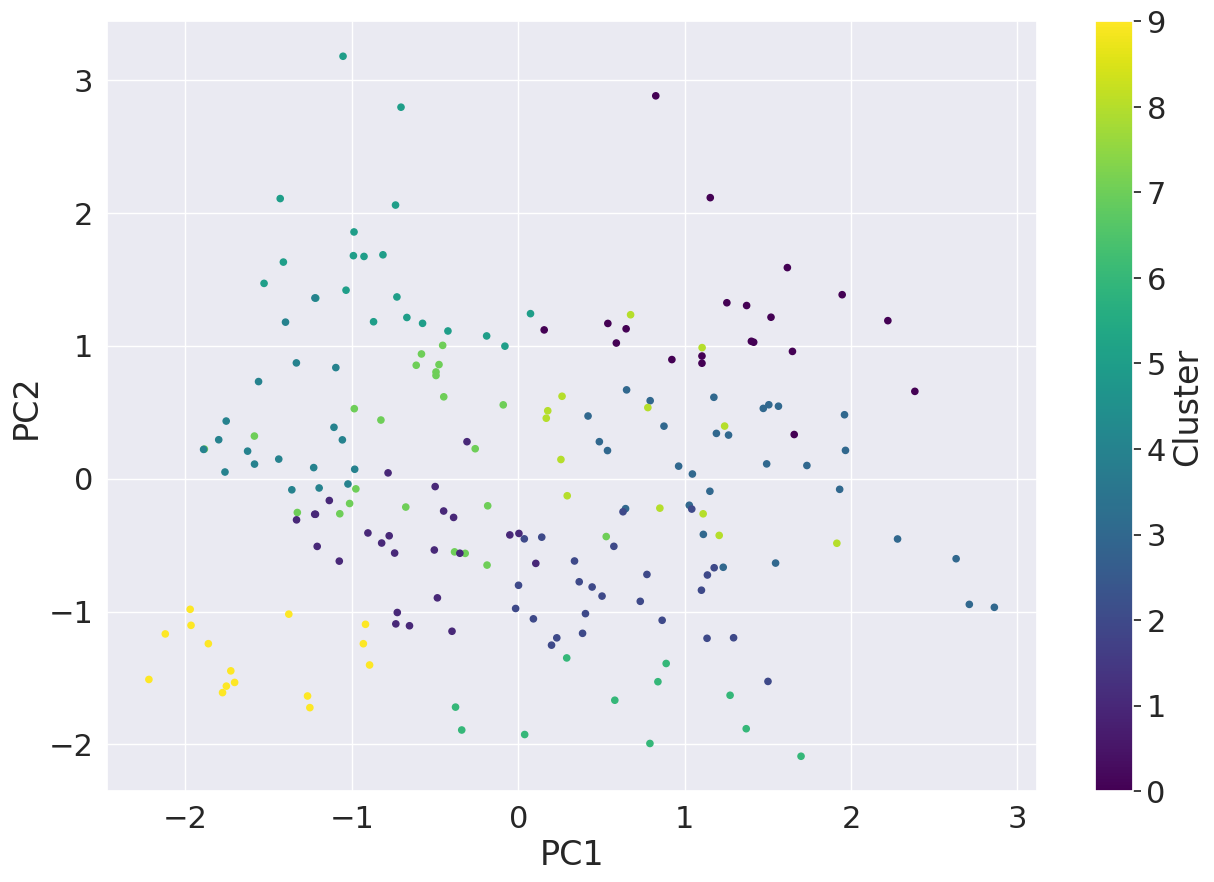

In [86]:
# Creación dataset dimensión reducida
df_reducido = pd.DataFrame()
df_reducido.index = clientes_imputed.index
df_reducido["PC1"] = pca_model.results['PC']["PC1"]
df_reducido["PC2"] = pca_model.results['PC']["PC2"]
df_reducido["Cluster"] = modelo_kmeans.labels_.astype(int)
# Representación de grupos en espacio de componentes
df_reducido.plot.scatter(x = "PC1", y = "PC2",
                         colormap = "viridis",
                         c = "Cluster")

**Interpretación de biplot**:
Nuestros clusters no se diferencian muy en esta dimensión reducida a dos componentes. Puede que sea de ayuda agregar una tercera componente y hacer un plot 3D.


